In [1]:
!pip install jovian --upgrade -q
import jovian
jovian.set_project('ml_project')

<IPython.core.display.Javascript object>

In [2]:
!pip install jovian opendatasets --upgrade --quiet

In [3]:
dataset_url = 'https://www.kaggle.com/iabhishekofficial/mobile-price-classification?select=train.csv' 

In [4]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: abhichand
Your Kaggle Key: ········


100%|██████████| 70.6k/70.6k [00:00<00:00, 376kB/s]

In [5]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings 
warnings.filterwarnings('ignore')
import sidetable as stb

In [6]:
pd.set_option('display.max_columns', None)

In [7]:
df = pd.read_csv('train.csv')
df.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2   2         20       756  2549     9     7         19   
1        136        3   6        905      1988  2631    17     3          7   
2        145        5   6       1263      1716  2603    11     2          9   
3        131        6   9       1216      1786  2769    16     8         11   
4        141        2  14       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1

In [8]:
df.info()

## all of the column types are in int or float generally speaking if we want to use all the columns for machine learning process 
## it's  ready without any encoding 
# this data probaby has no null values because we can see from the range index is 2000 value and all each columns have 2000 value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [9]:
df.describe()

battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean      0.521500    32.046500     0.501750   140.249000     4.520500   
std       0.499662    18.145715     0.288416    35.399655     2.287837   
min       0.000000     2.000000     0.100000    80.000000     1.000000   
25%       0.000000    16.000000     0.200000   109.000000     3.000000   
50%       1.000000    32.000000     0.500000   141.000000     4.000000   
75%       1.000000    48.000000     0.800000   170.000000     7.000000   
max       1.000000    64.000000     1.000000   200.000000     8.000000   

                pc    px_height     px_width          ram         sc_h  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean      9.916500   645.108000  1251.515500  2124.213000    12.306500   
std       6.064315   443.780811   432.199447  1084.732044     4.213245   
min       0.000000     0.000000   500.000000   256.000000     5.000000   
25%       5.000000   282.750000   874.750000  1207.500000     9.000000   
50%      10.000000   564.000000  1247.000000  2146.500000    12.000000   
75%      15.000000   947.250000  1633.000000  3064.500000    16.000000   
max      20.000000  1960.000000  1998.000000  3998.000000    19.000000   

              sc_w    talk_time      three_g  touch_screen         wifi  \
count  2000.000000  2000.000000  2000.000000   2000.000000  2000.000000   
mean      5.767000    11.011000     0.761500      0.503000     0.507000   
std       4.356398     5.463955     0.426273      0.500116     0.500076   
min       0.000000     2.000000     0.000000      0.000000     0.000000   
25%       2.000000     6.000000     1.000000      0.000000     0.000000   
50%       5.000000    11.000000     1.000000      1.000000     1.000000   
75%       9.000000    16.000000     1.000000      1.000000     1.000000   
max      18.000000    20.000000     1.000000      1.000000     1.000000   

       price_range  
count  2000.000000  
mean      1.500000  
std       1.118314  
min       0.000000  
25%       0.750000  
50%       1.500000  
75%       2.250000  
max       3.000000

In [10]:
# this dataset i assume is not from the 2020 phone because by just looking at the battery power there's no phone above 2000 MAH
# there's probaby an outlier in fc column (front camera mega pixel by looking the min and max value ) need more investigation 
# there's a phone without front camera in this dataset, might be a good insight to bin in 
# we could get a screen size by getting diagonal of phone screen height and width 
# the maximum ram in this phone is almost 4000 mb (4GB), this could be a good insight if we bin it properly
# the maximum core for this phone dataset is 8 cores (octacores) and the minimum is a single core phone (1 core)
# the heaviset phone is 200 gram which is normal for phone these days 
# we can group the phone by screen quality by using px_height, px_weight
# there's a row with 0 pixel height which is unusual not to have pixel height in a phone
# there's also an usual row value of 0 in screen width, it doesn't make sense that a phone has 0 width

## Checking the null value and the outliers of the columns 


In [12]:
## sanity check to make sure there's no null value in the columns 
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

great now we know there's no null value in the columns ,
we don't have to worry about dropping or filling some null val

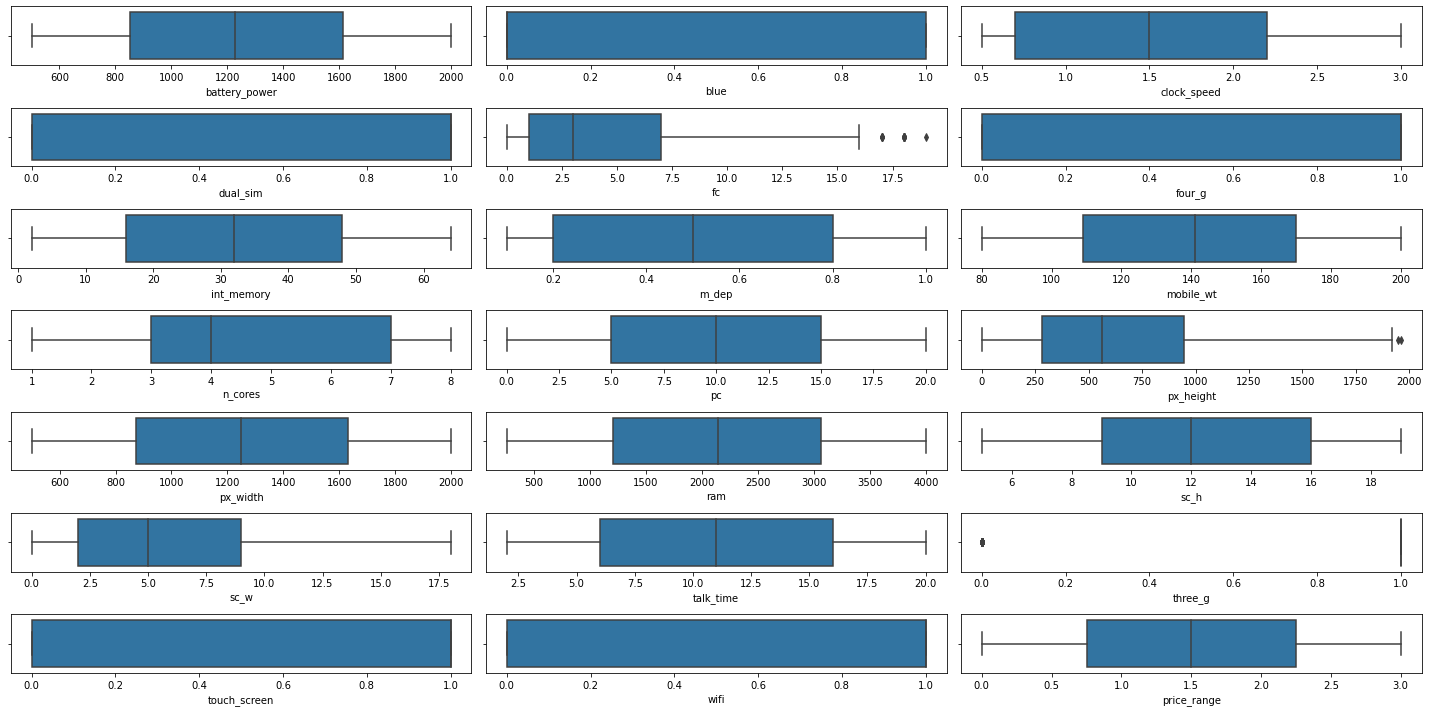

In [14]:
## outlier checking with a box plot 

plt.figure(figsize = (20, 10))
x = 1 

for column in df.columns :
    plt.subplot(7, 3, x)
    sns.boxplot(df[column])
    x+= 1

plt.tight_layout()

there's probably an outliers in fc column and we found some outliers there.
there are also and outliers in the px_height columns 
we won't worry about the outliers because it seems it only small proportion of the value we will figure out how many outliers are in those columns 

In [15]:
## getting the number of the outliers in fc column

df_description = df.describe()
fc_Q1 =  df_description['fc']['25%']
fc_Q3 = df_description['fc']['75%']
fc_IQR = fc_Q3 - fc_Q1

up_fence = fc_Q3 + (1.5 * fc_IQR)
lo_Fence = fc_Q1 - (1.5 * fc_IQR)

fc_outliers =  df[(df['fc'] < lo_Fence) | (df['fc']> up_fence)]
fc_outliers

# there are 18 phone that has a front camera outlier value 

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
95             1137     1          1.0         0  18       0           7   
169            1569     0          2.8         1  17       0          44   
226            1708     1          2.4         1  18       1          49   
229            1689     0          1.8         0  17       0          24   
300            1937     1          1.7         0  17       0          58   
305            1348     0          2.0         0  18       0          52   
372            1703     1          1.5         1  17       1          55   
584             946     1          2.6         1  17       0           5   
1387           1533     1          1.1         1  18       1          17   
1406           1731     1          2.3         1  18       0          60   
1416           1448     0          0.5         1  18       0           2   
1549           1772     1          1.6         0  17       1          45   
1554           1957     0          1.2         1  18       1          36   
1693            695     0          0.5         0  18       1          12   
1705           1290     1          1.4         1  19       1          35   
1880           1720     0          1.6         0  18       1           2   
1882            591     0          2.1         1  18       1          16   
1888           1544     0          2.4         0  18       1          12   

      m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  \
95      1.0        196        3  19        942      1179  3616    13     5   
169     0.3        110        4  20         45      1942  1260     9     2   
226     0.1        109        1  19        233       517  3388     6     4   
229     0.3        127        3  18        954      1200  2766     7     2   
300     0.6        189        1  19       1728      1767  3321     5     4   
305     0.3         98        3  20       1869      1942   955    18    11   
372     0.7        138        5  19       1411      1711  2993     5     1   
584     0.1        166        3  20       1698      1771  3720    15     7   
1387    0.3        160        4  20       1054      1393  2520     8     2   
1406    0.5        171        4  20        142      1039  1220     9     3   
1416    0.2        100        5  19        846      1144   593     9     4   
1549    0.5        159        2  18        837      1405  1146     6     1   
1554    0.8        151        2  19       1194      1727  1115    16     2   
1693    0.6        196        2  19       1649      1829  2855    16    13   
1705    0.3        110        4  20        405       742   879    16     2   
1880    0.8        188        5  20        334       896  2522    10     5   
1882    0.5        196        7  20        952      1726   704    14     5   
1888    0.1        186        7  20        470       844   489     9     4   

      talk_time  three_g  touch_screen  wifi  price_range  
95           12        1             1     1            3  
169          17        1             0     0            1  
226          16        1             1     1            3  
229           7        0             1     1            3  
300          14        1             1     0            3  
305           7        1             1     1            1  
372          20        1             1     1            3  
584           4        0             1     0            3  
1387         11        1             0     1            2  
1406         20        0             1     0            1  
1416         18        1             1     1            0  
1549         17        1             1     0            1  
1554         18        1             0     1            1  
1693          7        1             1     1            2  
1705          8        1             0     0            0  
1880          2        1             0     1            2  
1882          4        1             1     1            0 

In [16]:
px_height_Q1 =  df_description['px_height']['25%']
px_height_Q3 = df_description['px_height']['75%']
px_height_IQR = px_height_Q3 - px_height_Q1

up_fence_px_height = px_height_Q3 + (1.5 * px_height_IQR)
lo_Fence_px_height = px_height_Q1 - (1.5 * px_height_IQR)

px_height_outliers =  df[(df['px_height'] < lo_Fence_px_height) | (df['px_height']> up_fence_px_height)]
px_height_outliers

# there's only 2 phone that has an outlier value in the px_height column

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
988            1413     1          0.5         1   4       1          45   
1771           1230     1          1.6         0   0       1          48   

      m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  \
988     0.4        104        5   6       1949      1994  2973    17     8   
1771    0.7        111        7   2       1960      1963  1622    18    17   

      talk_time  three_g  touch_screen  wifi  price_range  
988          15        1             0     1            3  
1771         16        1             1     1            2

In [17]:
# total_number of outliers 

total_outliers = len(fc_outliers) + len(px_height_outliers)
print(f"total outliers of fc : {len(fc_outliers)}")
print(f"total outliers of px_height: {len(px_height_outliers)}" )
print(f"total percentage of outliers: {round((total_outliers / len(df))*100,2)}%")

# the outliers of the dataset is around 1 % of the entire dataset so we won't worry much about it because it polly wouldn't affect
# the analysis process 
# and we will try to bin the outliers value to have  a better analysis process 

total outliers of fc : 18
total outliers of px_height: 2
total percentage of outliers: 1.0%


In [18]:
## Handling Random Values

df[df['px_height'] == 0]

# we will group by the price range and replace the 0 value of px_height to the averaege of px_height based on price_range

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
1481           1834     0          2.1         0   7       1          40   
1933            897     1          2.0         0   3       1           2   

      m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  \
1481    0.1         99        4  11          0      1987  3692    13     0   
1933    0.6        154        8  10          0       994  1958     7     5   

      talk_time  three_g  touch_screen  wifi  price_range  
1481         16        1             1     0            3  
1933          7        1             1     0            1

In [23]:
df.groupby('price_range')['px_height'].mean()

price_range
0    536.408
1    666.892
2    632.284
3    744.848
Name: px_height, dtype: float64

In [24]:
df['px_height'] = df['px_height'].replace(0, np.nan)

# the index of the row with null value is 
# 1481
# 1933

In [25]:
df['px_height'] = df['px_height'].fillna(df.groupby('price_range')['px_height'].transform('mean'))

In [26]:
df[df['px_height'] == 0]

# now there is no 0 value in the in the pixel height 

Empty DataFrame
Columns: [battery_power, blue, clock_speed, dual_sim, fc, four_g, int_memory, m_dep, mobile_wt, n_cores, pc, px_height, px_width, ram, sc_h, sc_w, talk_time, three_g, touch_screen, wifi, price_range]
Index: []

In [27]:
df[df['sc_w'] == 0]

# this is almost 10 % of the data has a random values we will fill with the average of phone screen width to replace the 0 value
# we will group by the the price range and fill it based on the mean screensize per price range 

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
12             1815     0          2.8         0   2       0          33   
24              503     0          1.2         1   5       1           8   
33             1310     1          2.2         1   0       1          51   
42             1253     1          0.5         1   5       1           5   
50             1547     1          3.0         1   2       1          14   
...             ...   ...          ...       ...  ..     ...         ...   
1918            772     0          1.0         1   0       1          23   
1920            591     1          0.5         1   1       1          16   
1946            590     1          1.2         1   0       0          32   
1954            686     1          2.7         1   0       0          36   
1981           1454     0          2.6         0   8       0           6   

      m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  \
12      0.6        159        4  17      607.0       748  1482    18     0   
24      0.4        111        3  13      201.0      1245  2583    11     0   
33      0.6        100        4   0      178.0      1919  3845     7     0   
42      0.2        152        2  19      685.0       714  1878    15     0   
50      0.7        198        3  19     1042.0      1832  2059     5     0   
...     ...        ...      ...  ..        ...       ...   ...   ...   ...   
1918    0.6         97        7  11      317.0      1805  2782     7     0   
1920    0.9         90        6  17      892.0      1603  3746     5     0   
1946    0.4        141        6   1      227.0       509  1817    10     0   
1954    0.1        194        4   1       64.0       745  1503    10     0   
1981    0.4        199        3  20      698.0      1018  1300    10     0   

      talk_time  three_g  touch_screen  wifi  price_range  
12            2        1             0     0            1  
24           12        1             0     0            1  
33           12        1             1     0            3  
42            4        1             1     0            1  
50           15        1             0     1            2  
...         ...      ...           ...   ...          ...  
1918         17        1             0     0            2  
1920          5        1             1     0            3  
1946          6        0             1     0            0  
1954         13        0             0     0            0  
1981          2        0             0     1            1  

[180 rows x 21 columns]

In [28]:
df.groupby('price_range')['sc_w'].mean()

# this is the the mean for each price range and we will fill the 0 value of sc_w based on their price range 
# the index to check after filling are 33,42,50,1954 all this index representing all price range 

price_range
0    5.682
1    5.544
2    5.714
3    6.128
Name: sc_w, dtype: float64

In [29]:
# first we turn all the 0 value into nan value this is just because preference

df['sc_w'] = df['sc_w'].replace(0, np.nan)


In [30]:
df['sc_w'] = df['sc_w'].fillna(df.groupby('price_range')['sc_w'].transform('mean'))

In [31]:
df[df['sc_w'] == 0]

# now the screen width has no 0 values as well 

Empty DataFrame
Columns: [battery_power, blue, clock_speed, dual_sim, fc, four_g, int_memory, m_dep, mobile_wt, n_cores, pc, px_height, px_width, ram, sc_h, sc_w, talk_time, three_g, touch_screen, wifi, price_range]
Index: []

In [32]:
df[df['px_height'] < 200]

# having pixel height that's lower than 200 is still weird because of that's a super low resolution 
# comparing the minimum px width and the minimum px height is already kind of unsusal the min px_width is around 600 while
# for the px height is 1 right now after we clean all the 0 value 


#FYI :

# the oldest phone that only have around 200 - 300 px height is NOKIA 230 which has the resolution of 240 x 320 pixels
# and that nokia only have 16 MB RAM while in this dataset phone with 2GB or more RAM having that small resolusion is kind of
# random / suspicious to me 

# according to stackoverflow article below that lowest screen for a phone is 240 X 320 
#https://stackoverflow.com/questions/34035799/what-is-the-lowest-screen-resolution-for-a-smartphone

# however since this dataset doesnot mention what kind are phone in this dataset we're going to let is pass
# if this randomness of data bother us we will do a separate analysis on this 

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
11             1520     1          2.2         0   5       1          33   
28             1453     0          1.6         1  12       1          52   
32             1319     1          0.9         0   3       1          41   
33             1310     1          2.2         1   0       1          51   
...             ...   ...          ...       ...  ..     ...         ...   
1963           1906     1          1.9         1   3       0          55   
1965            659     0          1.4         1   2       1           3   
1972           1191     0          0.8         0   6       1          46   
1979           1614     0          1.2         0   1       1           9   
1991           1882     0          2.0         0  11       1          44   

      m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  \
0       0.6        188        2   2       20.0       756  2549     9   
11      0.5        177        8  18      151.0      1005  3826    14   
28      0.3         96        2  18      187.0      1311  2373    10   
32      0.9        107        1  18       85.0      1152  2227    18   
33      0.6        100        4   0      178.0      1919  3845     7   
...     ...        ...      ...  ..        ...       ...   ...   ...   
1963    0.2        113        3   4        3.0       629  1871    13   
1965    0.1         85        8   6      190.0       657   967    10   
1972    0.8         89        6   9       42.0       807   824    19   
1979    0.1        161        3   2      173.0      1219  1832    15   
1991    0.8        113        8  19        4.0       743  3579    19   

           sc_w  talk_time  three_g  touch_screen  wifi  price_range  
0      7.000000         19        0             0     1            1  
11     9.000000         13        1             1     1            3  
28     1.000000         10        1             1     1            2  
32     5.000000          3        1             1     1            1  
33     6.646421         12        1             1     0            3  
...         ...        ...      ...           ...   ...          ...  
1963   5.000000          4        1             0     1            1  
1965   1.000000         14        1             0     1            0  
1972  18.000000          7        1             0     0            0  
1979   8.000000         11        1             0     0            1  
1991   8.000000         20        1             1     0            3  

[345 rows x 21 columns]

### Screen Guide

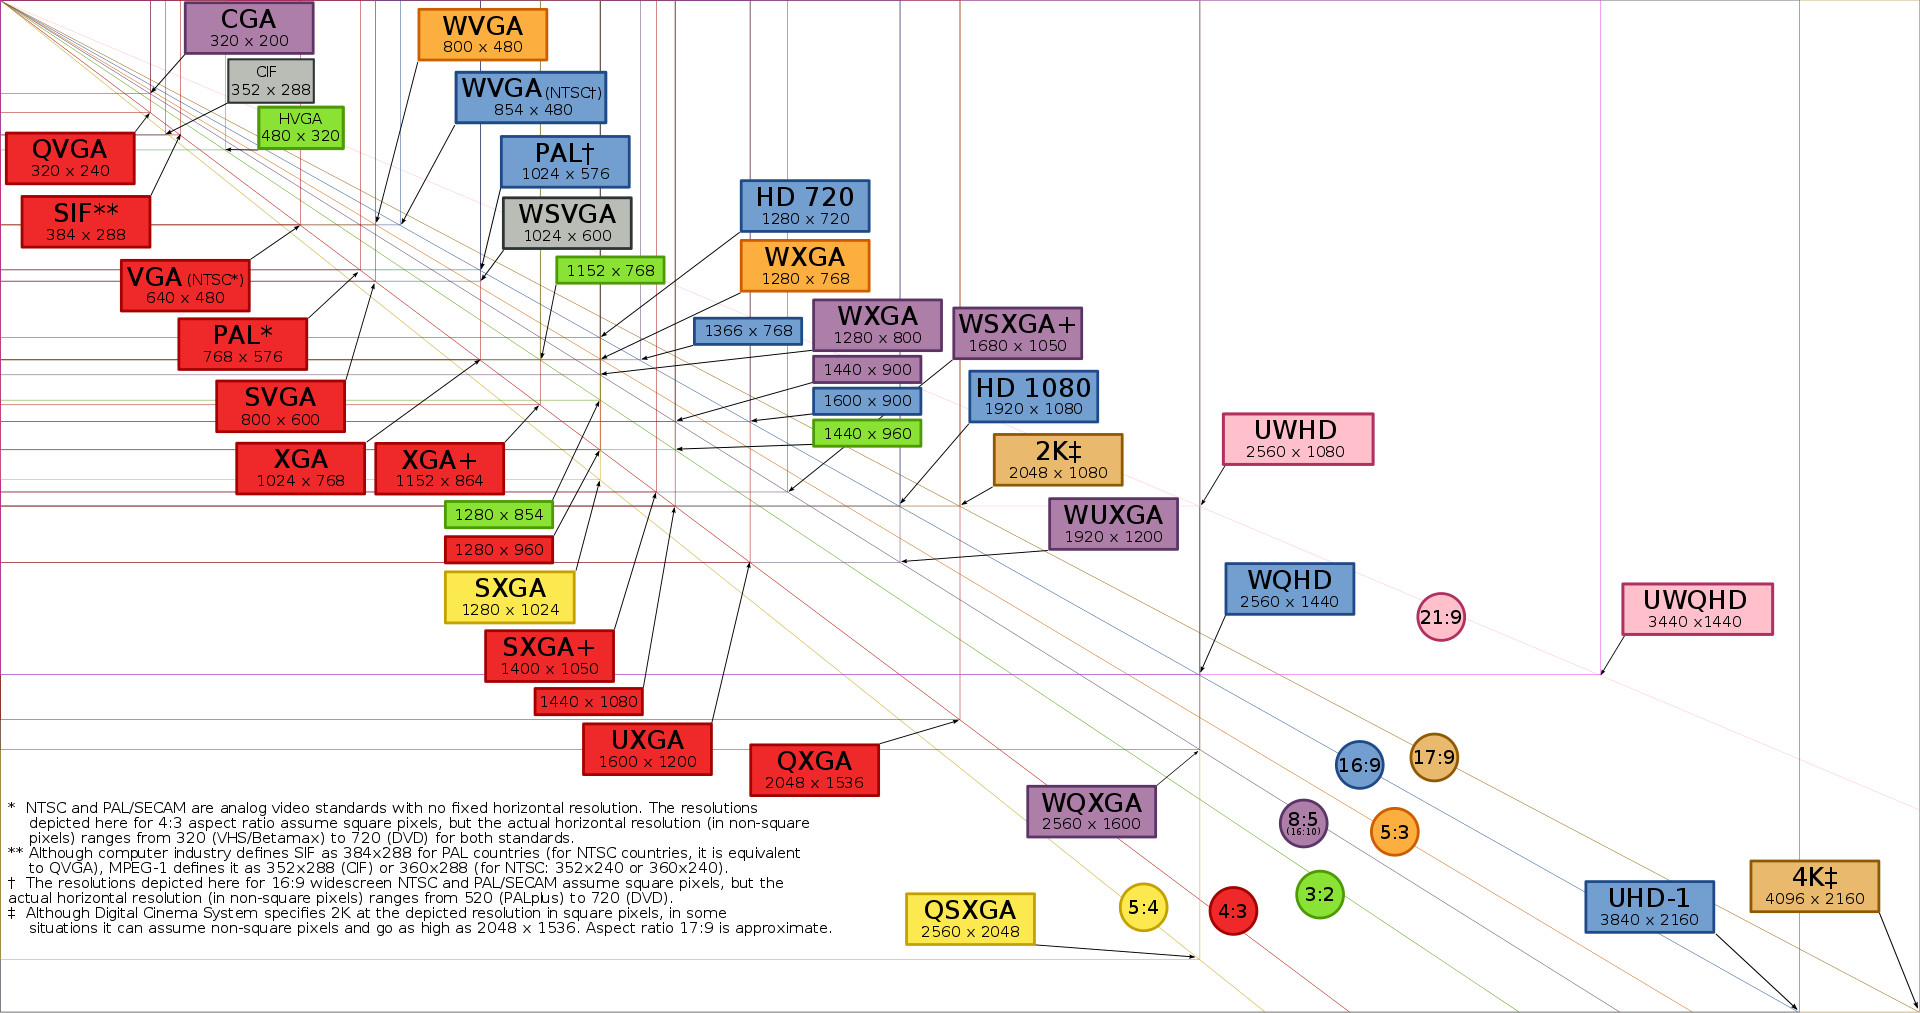

In [33]:
df.loc[df['px_height']<240, 'px_height'] = np.nan

In [34]:
df['px_height'] = df['px_height'].fillna(df.groupby('price_range')['px_height'].transform('mean'))

In [35]:
# just for sanity check to check the null value in all the row since i turned 0 values into np.nan

df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   float64
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   float64
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [37]:
df.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  pc    px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2   2   786.934862       756  2549     9   7.0         19   
1        136        3   6   905.000000      1988  2631    17   3.0          7   
2        145        5   6  1263.000000      1716  2603    11   2.0          9   
3        131        6   9  1216.000000      1786  2769    16   8.0         11   
4        141        2  14  1208.000000      1212  1411     8   2.0         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1

### Preparation Process (Feature Engineering for EDA) 

In [38]:
# front camera, since there're phone with front camera and phone without front camera i will create a new column whether 
# a phone has a front came or not 

df.loc[df['fc'] == 0, 'is_fc'] = 0
df.loc[df['fc'] > 0, 'is_fc'] = 1

df.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  pc    px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2   2   786.934862       756  2549     9   7.0         19   
1        136        3   6   905.000000      1988  2631    17   3.0          7   
2        145        5   6  1263.000000      1716  2603    11   2.0          9   
3        131        6   9  1216.000000      1786  2769    16   8.0         11   
4        141        2  14  1208.000000      1212  1411     8   2.0         15   

   three_g  touch_screen  wifi  price_range  is_fc  
0        0             0     1            1    1.0  
1        1             1     0            2    0.0  
2        1             1     0            2    1.0  
3        1             0     0            2    0.0  
4        1             1     0            1    1.0

In [39]:
## same goes to the primary camera 

df.loc[df['pc'] == 0, 'is_pc'] = 0
df.loc[df['pc'] > 0, 'is_pc'] = 1

df.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  pc    px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2   2   786.934862       756  2549     9   7.0         19   
1        136        3   6   905.000000      1988  2631    17   3.0          7   
2        145        5   6  1263.000000      1716  2603    11   2.0          9   
3        131        6   9  1216.000000      1786  2769    16   8.0         11   
4        141        2  14  1208.000000      1212  1411     8   2.0         15   

   three_g  touch_screen  wifi  price_range  is_fc  is_pc  
0        0             0     1            1    1.0    1.0  
1        1             1     0            2    0.0    1.0  
2        1             1     0            2    1.0    1.0  
3        1             0     0            2    0.0    1.0  
4        1             1     0            1    1.0    1.0

#### Getting Screen Sizes

- getting the screensize using pythagorean theory 
- but first we need to convert the height and he width to inces since the phone industry regular measurement of height and width of a screen is always in inches  
- 1 centimeter is equal to 0.3937007874 inches:

- resorces : 
    - https://www.rapidtables.com/convert/length/cm-to-inch.html
    - https://www.wikihow.com/Measure-Monitor-Size#Determining-Image-Area
    
    
#### Converting cm into inches
\begin{equation}
1 cm = \frac{1}{2.54} = 0.3937007874
\end{equation}


#### Getting screen size using pythagorean theory
\begin{equation}
C = \sqrt{A^2 + B^2}
\end{equation}





In [40]:
df['sc_h'] = df['sc_h'] / 2.54
df['sc_w'] = df['sc_w'] / 2.54

df.head()

# now all the screen height and the width are in inches we could use pythagorean theory to get the screen size

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  pc    px_height  px_width   ram      sc_h      sc_w  \
0        188        2   2   786.934862       756  2549  3.543307  2.755906   
1        136        3   6   905.000000      1988  2631  6.692913  1.181102   
2        145        5   6  1263.000000      1716  2603  4.330709  0.787402   
3        131        6   9  1216.000000      1786  2769  6.299213  3.149606   
4        141        2  14  1208.000000      1212  1411  3.149606  0.787402   

   talk_time  three_g  touch_screen  wifi  price_range  is_fc  is_pc  
0         19        0             0     1            1    1.0    1.0  
1          7        1             1     0            2    0.0    1.0  
2          9        1             1     0            2    1.0    1.0  
3         11        1             0     0            2    0.0    1.0  
4         15        1             1     0            1    1.0    1.0

In [41]:
## getting screen size 

df['screen_size'] = (np.sqrt(df['sc_h']**2 + df['sc_w']**2)).round(2)
df.head()

# now we get the screen size in inches we can drop the height and the width of the phone columns

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  pc    px_height  px_width   ram      sc_h      sc_w  \
0        188        2   2   786.934862       756  2549  3.543307  2.755906   
1        136        3   6   905.000000      1988  2631  6.692913  1.181102   
2        145        5   6  1263.000000      1716  2603  4.330709  0.787402   
3        131        6   9  1216.000000      1786  2769  6.299213  3.149606   
4        141        2  14  1208.000000      1212  1411  3.149606  0.787402   

   talk_time  three_g  touch_screen  wifi  price_range  is_fc  is_pc  \
0         19        0             0     1            1    1.0    1.0   
1          7        1             1     0            2    0.0    1.0   
2          9        1             1     0            2    1.0    1.0   
3         11        1             0     0            2    0.0    1.0   
4         15        1             1     0            1    1.0    1.0   

   screen_size  
0         4.49  
1         6.80  
2         4.40  
3         7.04  
4         3.25

In [42]:
df.drop(columns = ['sc_h', 'sc_w'], inplace = True)

In [43]:
df.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  pc    px_height  px_width   ram  talk_time  three_g  \
0        188        2   2   786.934862       756  2549         19        0   
1        136        3   6   905.000000      1988  2631          7        1   
2        145        5   6  1263.000000      1716  2603          9        1   
3        131        6   9  1216.000000      1786  2769         11        1   
4        141        2  14  1208.000000      1212  1411         15        1   

   touch_screen  wifi  price_range  is_fc  is_pc  screen_size  
0             0     1            1    1.0    1.0         4.49  
1             1     0            2    0.0    1.0         6.80  
2             1     0            2    1.0    1.0         4.40  
3             0     0            2    0.0    1.0         7.04  
4             1     0            1    1.0    1.0         3.25

### grouping screen resolution itu 2 different group




In [44]:
df.loc[(df['px_width'] < 1280) | (df['px_height'] < 720), 'screen_quality'] = 'Not HD'
df.loc[(df['px_width'] >= 1280) | (df['px_height'] >= 720), 'screen_quality'] = 'HD Screen'

df.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  pc    px_height  px_width   ram  talk_time  three_g  \
0        188        2   2   786.934862       756  2549         19        0   
1        136        3   6   905.000000      1988  2631          7        1   
2        145        5   6  1263.000000      1716  2603          9        1   
3        131        6   9  1216.000000      1786  2769         11        1   
4        141        2  14  1208.000000      1212  1411         15        1   

   touch_screen  wifi  price_range  is_fc  is_pc  screen_size screen_quality  
0             0     1            1    1.0    1.0         4.49      HD Screen  
1             1     0            2    0.0    1.0         6.80      HD Screen  
2             1     0            2    1.0    1.0         4.40      HD Screen  
3             0     0            2    0.0    1.0         7.04      HD Screen  
4             1     0            1    1.0    1.0         3.25      HD Screen

In [45]:
df[df['screen_quality'] == 'HD Screen']

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1993           1467     1          0.5         0   0       0          18   
1994            858     0          2.2         0   1       0          50   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   

      m_dep  mobile_wt  n_cores  pc    px_height  px_width   ram  talk_time  \
0       0.6        188        2   2   786.934862       756  2549         19   
1       0.7        136        3   6   905.000000      1988  2631          7   
2       0.9        145        5   6  1263.000000      1716  2603          9   
3       0.8        131        6   9  1216.000000      1786  2769         11   
4       0.6        141        2  14  1208.000000      1212  1411         15   
...     ...        ...      ...  ..          ...       ...   ...        ...   
1993    0.6        122        5   0   888.000000      1099  3962          5   
1994    0.1         84        1   2   528.000000      1416  3978          3   
1995    0.8        106        6  14  1222.000000      1890   668         19   
1996    0.2        187        4   3   915.000000      1965  2032         16   
1997    0.7        108        8   3   868.000000      1632  3057          5   

      three_g  touch_screen  wifi  price_range  is_fc  is_pc  screen_size  \
0           0             0     1            1    1.0    1.0         4.49   
1           1             1     0            2    0.0    1.0         6.80   
2           1             1     0            2    1.0    1.0         4.40   
3           1             0     0            2    0.0    1.0         7.04   
4           1             1     0            1    1.0    1.0         3.25   
...       ...           ...   ...          ...    ...    ...          ...   
1993        1             1     1            3    0.0    0.0         7.32   
1994        1             1     0            3    1.0    1.0         9.19   
1995        1             1     0            0    0.0    1.0         5.35   
1996        1             1     1            2    0.0    1.0         5.85   
1997        1             1     0            3    1.0    1.0         3.57   

     screen_quality  
0         HD Screen  
1         HD Screen  
2         HD Screen  
3         HD Screen  
4         HD Screen  
...             ...  
1993      HD Screen  
1994      HD Screen  
1995      HD Screen  
1996      HD Screen  
1997      HD Screen  

[1347 rows x 23 columns]

In [46]:
df[df['screen_quality'] == 'Not HD']

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
6              1821     0          1.7         0   4       1          10   
7              1954     0          0.5         1   0       0          24   
8              1445     1          0.5         0   0       0          53   
10              769     1          2.9         1   0       0           9   
12             1815     0          2.8         0   2       0          33   
...             ...   ...          ...       ...  ..     ...         ...   
1987            618     1          1.0         0   9       1          13   
1988           1547     1          2.9         0   2       0          57   
1989            586     0          2.8         0   2       0          15   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  talk_time  \
6       0.8        139        8  10      381.0      1018  3220         18   
7       0.8        187        4   0      512.0      1149   700          5   
8       0.7        174        7  14      386.0       836  1099         20   
10      0.1        182        5   1      248.0       874  3946          7   
12      0.6        159        4  17      607.0       748  1482          2   
...     ...        ...      ...  ..        ...       ...   ...        ...   
1987    0.1         80        4  15      591.0       724  1424          7   
1988    0.4        114        1   3      347.0       957  1620         19   
1989    0.2         83        3  11      241.0       854  2592          3   
1998    0.1        145        5   5      336.0       670   869         19   
1999    0.9        168        6  16      483.0       754  3919          2   

      three_g  touch_screen  wifi  price_range  is_fc  is_pc  screen_size  \
6           1             0     1            3    1.0    1.0         6.01   
7           1             1     1            0    0.0    0.0         6.41   
8           1             0     0            0    0.0    1.0         6.70   
10          0             0     0            3    0.0    1.0         2.12   
12          1             0     0            1    1.0    1.0         7.49   
...       ...           ...   ...          ...    ...    ...          ...   
1987        1             1     0            0    1.0    1.0         7.56   
1988        0             1     1            1    1.0    1.0         3.63   
1989        0             0     0            1    1.0    1.0         5.68   
1998        1             1     1            0    1.0    1.0         8.11   
1999        1             1     1            3    1.0    1.0         7.64   

     screen_quality  
6            Not HD  
7            Not HD  
8            Not HD  
10           Not HD  
12           Not HD  
...             ...  
1987         Not HD  
1988         Not HD  
1989         Not HD  
1998         Not HD  
1999         Not HD  

[653 rows x 23 columns]

### Binning RAM size 




In [47]:
bin_ram_size = [256, 512, 1000, 2000, 3000, 4000]
label_ram = ['256 to 512 MB', '512 MB to 1GB', '1 to 2 GB', '2 to 3 GB', '3 to 4 GB']

df['ram_size'] = pd.cut(df['ram'], bins = bin_ram_size, labels = label_ram)

df.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  pc    px_height  px_width   ram  talk_time  three_g  \
0        188        2   2   786.934862       756  2549         19        0   
1        136        3   6   905.000000      1988  2631          7        1   
2        145        5   6  1263.000000      1716  2603          9        1   
3        131        6   9  1216.000000      1786  2769         11        1   
4        141        2  14  1208.000000      1212  1411         15        1   

   touch_screen  wifi  price_range  is_fc  is_pc  screen_size screen_quality  \
0             0     1            1    1.0    1.0         4.49      HD Screen   
1             1     0            2    0.0    1.0         6.80      HD Screen   
2             1     0            2    1.0    1.0         4.40      HD Screen   
3             0     0            2    0.0    1.0         7.04      HD Screen   
4             1     0            1    1.0    1.0         3.25      HD Screen   

    ram_size  
0  2 to 3 GB  
1  2 to 3 GB  
2  2 to 3 GB  
3  2 to 3 GB  
4  1 to 2 GB

### Binning Clock Speed

In [48]:
clock_speed_bin = [0, 1.0,1.5,2.0,2.5,3.0]
clock_bin_label = ['upto 1GHz', 'upto 1.5GHz', 'upto 2GHz', 'upto 2.5GHz', 'upto 3.0GHz']

df['speed'] = pd.cut(df['clock_speed'], bins = clock_speed_bin, labels = clock_bin_label)

df.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  pc    px_height  px_width   ram  talk_time  three_g  \
0        188        2   2   786.934862       756  2549         19        0   
1        136        3   6   905.000000      1988  2631          7        1   
2        145        5   6  1263.000000      1716  2603          9        1   
3        131        6   9  1216.000000      1786  2769         11        1   
4        141        2  14  1208.000000      1212  1411         15        1   

   touch_screen  wifi  price_range  is_fc  is_pc  screen_size screen_quality  \
0             0     1            1    1.0    1.0         4.49      HD Screen   
1             1     0            2    0.0    1.0         6.80      HD Screen   
2             1     0            2    1.0    1.0         4.40      HD Screen   
3             0     0            2    0.0    1.0         7.04      HD Screen   
4             1     0            1    1.0    1.0         3.25      HD Screen   

    ram_size        speed  
0  2 to 3 GB  upto 2.5GHz  
1  2 to 3 GB    upto 1GHz  
2  2 to 3 GB    upto 1GHz  
3  2 to 3 GB  upto 2.5GHz  
4  1 to 2 GB  upto 1.5GHz

In [49]:
df.loc[df['n_cores'] == 1 , 'multicore_processor'] = 0
df.loc[df['n_cores'] > 1 , 'multicore_processor'] = 1

df.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  pc    px_height  px_width   ram  talk_time  three_g  \
0        188        2   2   786.934862       756  2549         19        0   
1        136        3   6   905.000000      1988  2631          7        1   
2        145        5   6  1263.000000      1716  2603          9        1   
3        131        6   9  1216.000000      1786  2769         11        1   
4        141        2  14  1208.000000      1212  1411         15        1   

   touch_screen  wifi  price_range  is_fc  is_pc  screen_size screen_quality  \
0             0     1            1    1.0    1.0         4.49      HD Screen   
1             1     0            2    0.0    1.0         6.80      HD Screen   
2             1     0            2    1.0    1.0         4.40      HD Screen   
3             0     0            2    0.0    1.0         7.04      HD Screen   
4             1     0            1    1.0    1.0         3.25      HD Screen   

    ram_size        speed  multicore_processor  
0  2 to 3 GB  upto 2.5GHz                  1.0  
1  2 to 3 GB    upto 1GHz                  1.0  
2  2 to 3 GB    upto 1GHz                  1.0  
3  2 to 3 GB  upto 2.5GHz                  1.0  
4  1 to 2 GB  upto 1.5GHz                  1.0

### Binning Camera Pixels 

In [50]:
bin_camera = [0,4,8,12,16,20]
bin_camera_label = ['upto 4MP', 'upto 8MP', 'upto 12MP', 'upto 16MP', 'upto 20MP']
camera_dict = {0:'No Camera'}

df['primary_camera'] = pd.cut(df['pc'], bins = bin_camera, labels = bin_camera_label)


df['primary_camera'] = df['primary_camera'].cat.add_categories('No Camera')
df['primary_camera'] = df['primary_camera'].fillna(df['pc'].map(camera_dict))
df.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  pc    px_height  px_width   ram  talk_time  three_g  \
0        188        2   2   786.934862       756  2549         19        0   
1        136        3   6   905.000000      1988  2631          7        1   
2        145        5   6  1263.000000      1716  2603          9        1   
3        131        6   9  1216.000000      1786  2769         11        1   
4        141        2  14  1208.000000      1212  1411         15        1   

   touch_screen  wifi  price_range  is_fc  is_pc  screen_size screen_quality  \
0             0     1            1    1.0    1.0         4.49      HD Screen   
1             1     0            2    0.0    1.0         6.80      HD Screen   
2             1     0            2    1.0    1.0         4.40      HD Screen   
3             0     0            2    0.0    1.0         7.04      HD Screen   
4             1     0            1    1.0    1.0         3.25      HD Screen   

    ram_size        speed  multicore_processor primary_camera  
0  2 to 3 GB  upto 2.5GHz                  1.0       upto 4MP  
1  2 to 3 GB    upto 1GHz                  1.0       upto 8MP  
2  2 to 3 GB    upto 1GHz                  1.0       upto 8MP  
3  2 to 3 GB  upto 2.5GHz                  1.0      upto 12MP  
4  1 to 2 GB  upto 1.5GHz                  1.0      upto 16MP

In [51]:
bin_camera = [0,4,8,12,16,20]
bin_camera_label = ['upto 4MP', 'upto 8MP', 'upto 12MP', 'upto 16MP', 'upto 20MP']
camera_dict = {0:'No Camera'}


df['front_camera'] = pd.cut(df['fc'], bins = bin_camera, labels = bin_camera_label)


df['front_camera'] = df['front_camera'].cat.add_categories('No Camera')
df['front_camera'] = df['front_camera'].fillna(df['fc'].map(camera_dict))
df[(df['fc'] == 0) & (df['pc'] == 0)]

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
7              1954     0          0.5         1   0       0          24   
33             1310     1          2.2         1   0       1          51   
52             1654     1          1.5         1   0       1          43   
54             1073     1          0.5         1   0       0          51   
62             1156     1          1.2         1   0       1          50   
...             ...   ...          ...       ...  ..     ...         ...   
1906           1807     0          0.8         1   0       1          38   
1911           1259     0          1.2         1   0       0          13   
1931           1854     0          0.9         1   0       1          33   
1968           1667     0          1.0         1   0       1          21   
1993           1467     1          0.5         0   0       0          18   

      m_dep  mobile_wt  n_cores  pc    px_height  px_width   ram  talk_time  \
7       0.8        187        4   0   512.000000      1149   700          5   
33      0.6        100        4   0   874.051548      1919  3845         12   
52      0.3        109        2   0   546.000000       629  3112         10   
54      0.5        145        7   0   690.000000       804  2908         18   
62      0.8        159        2   0   322.000000       547   470         15   
...     ...        ...      ...  ..          ...       ...   ...        ...   
1906    0.2         97        8   0  1332.000000      1814  1069          7   
1911    0.5         97        2   0  1210.000000      1989   340          4   
1931    0.4        195        1   0   665.000000       718  1675          9   
1968    0.9        138        2   0  1211.000000      1396   635         15   
1993    0.6        122        5   0   888.000000      1099  3962          5   

      three_g  touch_screen  wifi  price_range  is_fc  is_pc  screen_size  \
7           1             1     1            0    0.0    0.0         6.41   
33          1             1     0            3    0.0    0.0         3.80   
52          1             1     0            3    0.0    0.0         5.12   
54          0             1     0            2    0.0    0.0         3.42   
62          1             1     0            0    0.0    0.0         3.71   
...       ...           ...   ...          ...    ...    ...          ...   
1906        1             0     0            1    0.0    0.0         3.63   
1911        1             0     1            0    0.0    0.0         8.43   
1931        1             0     1            1    0.0    0.0         7.26   
1968        1             0     0            0    0.0    0.0         7.24   
1993        1             1     1            3    0.0    0.0         7.32   

     screen_quality       ram_size        speed  multicore_processor  \
7            Not HD  512 MB to 1GB    upto 1GHz                  1.0   
33        HD Screen      3 to 4 GB  upto 2.5GHz                  1.0   
52           Not HD      3 to 4 GB  upto 1.5GHz                  1.0   
54           Not HD      2 to 3 GB    upto 1GHz                  1.0   
62           Not HD  256 to 512 MB  upto 1.5GHz                  1.0   
...             ...            ...          ...                  ...   
1906      HD Screen      1 to 2 GB    upto 1GHz                  1.0   
1911      HD Screen  256 to 512 MB  upto 1.5GHz                  1.0   
1931         Not HD      1 to 2 GB    upto 1GHz                  0.0   
1968      HD Screen  512 MB to 1GB    upto 1GHz                  1.0   
1993      HD Screen      3 to 4 GB    upto 1GHz                  1.0   

     primary_camera front_camera  
7         No Camera    No Camera  
33        No Camera    No Camera  
52        No Camera    No Camera  
54        No Camera    No Camera  
62        No Camera    No Camera  
...             ...          ...  
1906      No Camera    No Camera  
1911      No Camera    No Camera  
1931      No Camera    No Camera  
1968

## Exploratory Data Analysis 

### Univariate Analysis

<AxesSubplot:>

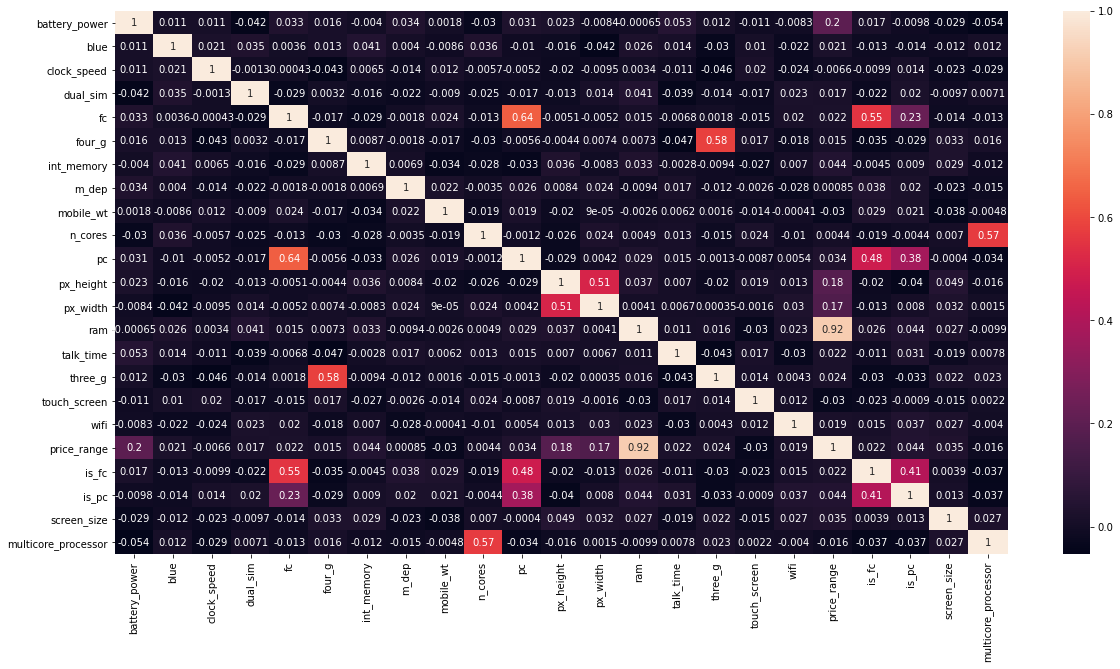

In [52]:
plt.figure(figsize = (20, 10))
sns.heatmap(df.corr(), annot = True)

In [53]:
correlation = df.corr()
correlation['price_range'].sort_values(ascending = False)[1:]

# correlation just to help you see a bigger picture of what's actually affecting a price range \
# from this we can see that the size of a ram is highly correlated with price range 

ram                    0.917046
battery_power          0.200723
px_height              0.183910
px_width               0.165818
int_memory             0.044435
is_pc                  0.043910
screen_size            0.034804
pc                     0.033599
three_g                0.023611
is_fc                  0.022085
fc                     0.021998
talk_time              0.021859
blue                   0.020573
wifi                   0.018785
dual_sim               0.017444
four_g                 0.014772
n_cores                0.004399
m_dep                  0.000853
clock_speed           -0.006606
multicore_processor   -0.016455
mobile_wt             -0.030302
touch_screen          -0.030411
Name: price_range, dtype: float64

In [54]:
df.describe()

# the average size of a phone is around 5.5 inches

battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean      0.521500    32.046500     0.501750   140.249000     4.520500   
std       0.499662    18.145715     0.288416    35.399655     2.287837   
min       0.000000     2.000000     0.100000    80.000000     1.000000   
25%       0.000000    16.000000     0.200000   109.000000     3.000000   
50%       1.000000    32.000000     0.500000   141.000000     4.000000   
75%       1.000000    48.000000     0.800000   170.000000     7.000000   
max       1.000000    64.000000     1.000000   200.000000     8.000000   

                pc    px_height     px_width          ram    talk_time  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean      9.916500   781.500027  1251.515500  2124.213000    11.011000   
std       6.064315   353.792639   432.199447  1084.732044     5.463955   
min       0.000000   240.000000   500.000000   256.000000     2.000000   
25%       5.000000   518.000000   874.750000  1207.500000     6.000000   
50%      10.000000   762.500000  1247.000000  2146.500000    11.000000   
75%      15.000000   947.250000  1633.000000  3064.500000    16.000000   
max      20.000000  1960.000000  1998.000000  3998.000000    20.000000   

           three_g  touch_screen         wifi  price_range        is_fc  \
count  2000.000000   2000.000000  2000.000000  2000.000000  2000.000000   
mean      0.761500      0.503000     0.507000     1.500000     0.763000   
std       0.426273      0.500116     0.500076     1.118314     0.425349   
min       0.000000      0.000000     0.000000     0.000000     0.000000   
25%       1.000000      0.000000     0.000000     0.750000     1.000000   
50%       1.000000      1.000000     1.000000     1.500000     1.000000   
75%       1.000000      1.000000     1.000000     2.250000     1.000000   
max       1.000000      1.000000     1.000000     3.000000     1.000000   

             is_pc  screen_size  multicore_processor  
count  2000.000000   2000.00000          2000.000000  
mean      0.949500      5.57026             0.879000  
std       0.219029      1.96248             0.326209  
min       0.000000      2.01000             0.000000  
25%       1.000000      3.88000             1.000000  
50%       1.000000      5.64000             1.000000  
75%       1.000000      7.10000             1.000000  
max       1.000000     10.30000             1.000000

In [55]:
df.describe(include = 'O')

screen_quality
count            2000
unique              2
top         HD Screen
freq             1347

In [56]:
df.head(1)

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   

   mobile_wt  n_cores  pc   px_height  px_width   ram  talk_time  three_g  \
0        188        2   2  786.934862       756  2549         19        0   

   touch_screen  wifi  price_range  is_fc  is_pc  screen_size screen_quality  \
0             0     1            1    1.0    1.0         4.49      HD Screen   

    ram_size        speed  multicore_processor primary_camera front_camera  
0  2 to 3 GB  upto 2.5GHz                  1.0       upto 4MP     upto 4MP

In [57]:
df.stb.freq(['blue'], cum_cols=False)

# half of the phone in the dataset doesnot have bluetooth while the other half have bluetooth


blue  count  percent
0     0   1010     50.5
1     1    990     49.5

In [58]:
df.stb.freq(['dual_sim'], cum_cols=False)

# half of the phone here have a dual simcard slot the other half doesn't

dual_sim  count  percent
0         1   1019    50.95
1         0    981    49.05

In [59]:
df.stb.freq(['fc'], cum_cols=False)

# majority of phone in this dataset have a front facing camera
# almost a quarter of the phone in this dataset doesn't have front facing camera 

fc  count  percent
0    0    474    23.70
1    1    245    12.25
2    2    189     9.45
3    3    170     8.50
4    5    139     6.95
5    4    133     6.65
6    6    112     5.60
7    7    100     5.00
8    9     78     3.90
9    8     77     3.85
10  10     62     3.10
11  11     51     2.55
12  12     45     2.25
13  13     40     2.00
14  16     24     1.20
15  15     23     1.15
16  14     20     1.00
17  18     11     0.55
18  17      6     0.30
19  19      1     0.05

In [60]:
df.stb.freq(['speed'], cum_cols=False)

# 63.6% of phones in this data set has a processing speed more than 1 GHZ 

speed  count  percent
0    upto 1GHz    728    36.40
1  upto 2.5GHz    345    17.25
2    upto 2GHz    330    16.50
3  upto 1.5GHz    312    15.60
4  upto 3.0GHz    285    14.25

In [61]:
df.stb.freq(['n_cores'], cum_cols=False)

# most of the phones in this dataset is a multicore processor (more than 1 core processing)
# only 12.1 percent is a single core

n_cores  count  percent
0        4    274    13.70
1        7    259    12.95
2        8    256    12.80
3        2    247    12.35
4        5    246    12.30
5        3    246    12.30
6        1    242    12.10
7        6    230    11.50

In [62]:
df.stb.freq(['pc'], cum_cols=False)

# 95% phone in this dataset has a primary camera (back camera)
# only 5 % of phones in this dataset doens't have camera 

pc  count  percent
0   10    122     6.10
1    7    119     5.95
2    9    112     5.60
3   20    110     5.50
4   14    104     5.20
5    1    104     5.20
6    0    101     5.05
7   17     99     4.95
8    2     99     4.95
9    6     95     4.75
10   4     95     4.75
11   3     93     4.65
12  15     92     4.60
13  12     90     4.50
14   8     89     4.45
15  16     88     4.40
16  13     85     4.25
17  19     83     4.15
18  18     82     4.10
19  11     79     3.95
20   5     59     2.95

In [63]:
df.stb.freq(['ram_size'], cum_cols=False)

# more than 3/4 phones in this dataset has ram over 1 GB
# while the rest has ram less than 1 GB

ram_size  count    percent
0      2 to 3 GB    556  27.813907
1      3 to 4 GB    524  26.213107
2      1 to 2 GB    522  26.113057
3  512 MB to 1GB    255  12.756378
4  256 to 512 MB    142   7.103552

In [64]:
df.stb.freq(['talk_time'], cum_cols=False)

# talk time in this data set seems to be spread out evenly

talk_time  count  percent
0           7    124     6.20
1           4    123     6.15
2          16    116     5.80
3          15    115     5.75
4          19    113     5.65
5           6    111     5.55
6          10    105     5.25
7           8    104     5.20
8          11    103     5.15
9          20    102     5.10
10         14    101     5.05
11         18    100     5.00
12         13    100     5.00
13          9    100     5.00
14         12     99     4.95
15          2     99     4.95
16         17     98     4.90
17          3     94     4.70
18          5     93     4.65

In [65]:
df.stb.freq(['four_g'], cum_cols=False)

# half of the dataset here have a 4G line while the rest doesn't 

four_g  count  percent
0       1   1043    52.15
1       0    957    47.85

In [66]:
df.stb.freq(['three_g'], cum_cols=False)

# three quarter of the phones in this data set has a 3G line 
# while quarter of it doesn't even have 3G

three_g  count  percent
0        1   1523    76.15
1        0    477    23.85

In [67]:
df.stb.freq(['touch_screen'], cum_cols=False)

# touch screen technology seems to spread out half and half for phone in this dataset

touch_screen  count  percent
0             1   1006     50.3
1             0    994     49.7

In [68]:
df.stb.freq(['wifi'], cum_cols=False)

# same goes to wifi technology

wifi  count  percent
0     1   1014     50.7
1     0    986     49.3

In [69]:
df.stb.freq(['price_range'], cum_cols=False)

# the phone in this dataset seems to be spread out a quarter for each price range

price_range  count  percent
0            3    500     25.0
1            2    500     25.0
2            1    500     25.0
3            0    500     25.0

In [70]:
df.stb.freq(['screen_quality'], cum_cols=False)

# majority of the phone here have a HD quality screen

screen_quality  count  percent
0      HD Screen   1347    67.35
1         Not HD    653    32.65

### Multivariate Analysis 


since price range is our target variable here we're going to focus on how the each of independent variable will affect the price range of an item, and then we will dive in deeper on how each independent variable effect each other and how combined independent variable will effect price


In [71]:
df.head(1)

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   

   mobile_wt  n_cores  pc   px_height  px_width   ram  talk_time  three_g  \
0        188        2   2  786.934862       756  2549         19        0   

   touch_screen  wifi  price_range  is_fc  is_pc  screen_size screen_quality  \
0             0     1            1    1.0    1.0         4.49      HD Screen   

    ram_size        speed  multicore_processor primary_camera front_camera  
0  2 to 3 GB  upto 2.5GHz                  1.0       upto 4MP     upto 4MP

### Battery, Talktime, and RAM

In [72]:
pd.crosstab(df['price_range'], columns = ['Average Battery'], values = df['battery_power'], aggfunc='mean')

## we can see that the higher the price range it tend to have a higher battery except on the price range 1 to 2 it seems that from
# price range 1 to 2 there's no significance difference from the average  battery power 

col_0        Average Battery
price_range                 
0                   1116.902
1                   1228.868
2                   1228.320
3                   1379.984

In [73]:
pd.crosstab(df['price_range'], columns = 'Average Talk Time', values = df['talk_time'], aggfunc='mean')

# itseems that talk time doesn't really affect much on the price range of a cellphone

col_0        Average Talk Time
price_range                   
0                       10.612
1                       11.362
2                       10.972
3                       11.098

In [74]:
df.groupby('price_range')['talk_time','battery_power'].mean()

# while the battery power is somewhat positively correlated correlated with the price range 
# the higher the battery power doesn't always mean a longer talk time 

talk_time  battery_power
price_range                          
0               10.612       1116.902
1               11.362       1228.868
2               10.972       1228.320
3               11.098       1379.984

In [75]:
## comparing those three item with ram since from the correlation ram has the highest correlation among all columns

df.groupby('price_range')['talk_time','battery_power','ram'].mean()

# so the higher price range has a significanly higher ram, and the higher the ram the higher the battery of a phone 

talk_time  battery_power       ram
price_range                                    
0               10.612       1116.902   785.314
1               11.362       1228.868  1679.490
2               10.972       1228.320  2582.816
3               11.098       1379.984  3449.232

### Camera and Price Range

In [76]:
pd.crosstab(df['price_range'], df['front_camera'], normalize = 'columns')

# there's no a distinguish pattern from looking the the camera pixel except on the upto 20mp phone primary camera 

front_camera  upto 4MP  upto 8MP  upto 12MP  upto 16MP  upto 20MP  No Camera
price_range                                                                 
0             0.257802  0.250000   0.237288   0.205607   0.222222   0.255274
1             0.244233  0.233645   0.245763   0.308411   0.277778   0.261603
2             0.223881  0.271028   0.305085   0.214953   0.166667   0.255274
3             0.274084  0.245327   0.211864   0.271028   0.333333   0.227848

In [77]:
pd.crosstab(df['price_range'], df['primary_camera'], normalize = 'columns')

# the majority of no camera phone are in the price range 0 which is kinda make sense less technoloy = cheaper price  

primary_camera  upto 4MP  upto 8MP  upto 12MP  upto 16MP  upto 20MP  No Camera
price_range                                                                   
0               0.263427  0.229282   0.253102   0.257453   0.224599   0.326733
1               0.255754  0.245856   0.258065   0.211382   0.272727   0.267327
2               0.245524  0.254144   0.245658   0.298103   0.221925   0.198020
3               0.235294  0.270718   0.243176   0.233062   0.280749   0.207921

In [78]:
df.groupby('price_range')['fc','pc'].mean()

# while front camera seems doesn't have any implication to price_range 
# it seems that higher price range has a higher megapixel on the primary camera 

fc      pc
price_range               
0            4.084   9.574
1            4.340   9.924
2            4.498  10.018
3            4.316  10.150

### Pixel, Screen Size and Price range

In [79]:
df.groupby('price_range')['px_height', 'px_width','screen_size'].mean()


# the pixel width and and height is somehow correlated with the price range 
# the higher the price range the higher the chances px_width and px_height
# the higest pricest range has the biggest screen size while, in general it doesn't seem to effect much on the price range

px_height  px_width  screen_size
price_range                                   
0            679.602703  1150.270      5.55896
1            786.934862  1251.908      5.49266
2            785.410995  1234.046      5.45398
3            874.051548  1369.838      5.77544

### Internal Memory and RAM, weight and Price Range



In [80]:
df.groupby('price_range')['int_memory', 'ram', 'mobile_wt'].mean()


int_memory       ram  mobile_wt
price_range                                 
0                31.174   785.314    140.552
1                32.116  1679.490    140.510
2                30.920  2582.816    143.614
3                33.976  3449.232    136.320

### Touch Screen and Price Range

In [81]:
pd.crosstab(df['price_range'], df['touch_screen'], normalize = 'columns')

touch_screen         0         1
price_range                     
0             0.239437  0.260437
1             0.240443  0.259443
2             0.266600  0.233598
3             0.253521  0.246521

### Visualization 

In [82]:
df.head(1)

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   

   mobile_wt  n_cores  pc   px_height  px_width   ram  talk_time  three_g  \
0        188        2   2  786.934862       756  2549         19        0   

   touch_screen  wifi  price_range  is_fc  is_pc  screen_size screen_quality  \
0             0     1            1    1.0    1.0         4.49      HD Screen   

    ram_size        speed  multicore_processor primary_camera front_camera  
0  2 to 3 GB  upto 2.5GHz                  1.0       upto 4MP     upto 4MP

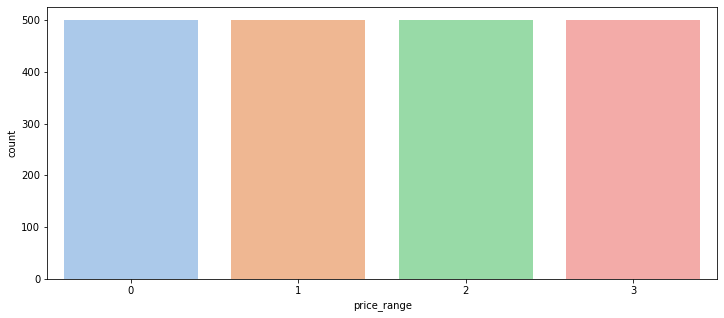

In [83]:
#price range 

plt.figure(figsize = (12, 5))
sns.countplot(df['price_range'], palette = 'pastel')
plt.show()

# there are 500 phones in each price_range

In [84]:
# in general that the disribution of  the ram size is multimodal distribution let's break it down
# per price range 

Text(0.5, 1.0, 'RAM distribution of price range 3')

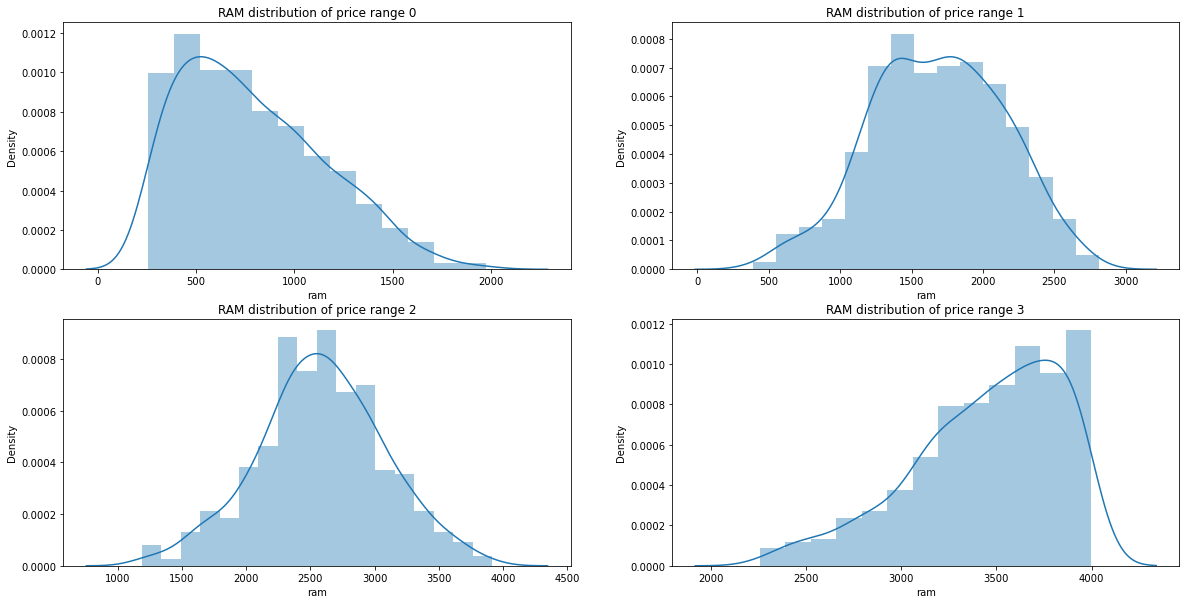

In [85]:
df_price_0 = df[df['price_range']==0]
df_price_1 = df[df['price_range']==1]
df_price_2 = df[df['price_range']==2]
df_price_3 = df[df['price_range']==3]

plt.figure(figsize = (20, 10))
plt.subplot(2,2,1)
sns.distplot(df_price_0['ram'])
plt.title('RAM distribution of price range 0')
plt.subplot(2,2,2)
sns.distplot(df_price_1['ram'])
plt.title('RAM distribution of price range 1')
plt.subplot(2,2,3)
sns.distplot(df_price_2['ram'])
plt.title('RAM distribution of price range 2')
plt.subplot(2,2,4)
sns.distplot(df_price_3['ram'])
plt.title('RAM distribution of price range 3')

# we can see from the chart below that the distribution is looking very different if we compare it 
# per price range 

# for the the price range 0 majority of the phone are in range of 400 - 700 mb RAM, and the max is around 2000 mb
# for  price range 1 ranging from 500 - 3000 with the highest distribution on RAM around 1300 - 2000mb
# for the price range 2 the RAM distribution ranging  from 1000 - 4000 mb with the highest distribution
# around 2500mb
# for the highest price range the ram range from 2000mb to - 4000 mb with the highest distribution around 4000 mb

# this we can make conclusion that from our last analysis that the higher the price range the higher 
# the average ram size 

# and from this distribution plot we can see that the min value of ram increases with the increase 
# of the price range this conclude that the higher price range has higher min value of ram 

### Battery 

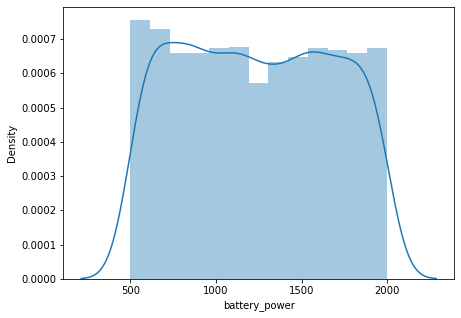

In [86]:
plt.figure(figsize = (7, 5))
sns.distplot(df['battery_power'])
plt.show()

Text(0.5, 1.0, 'battery distribution of price range 3')

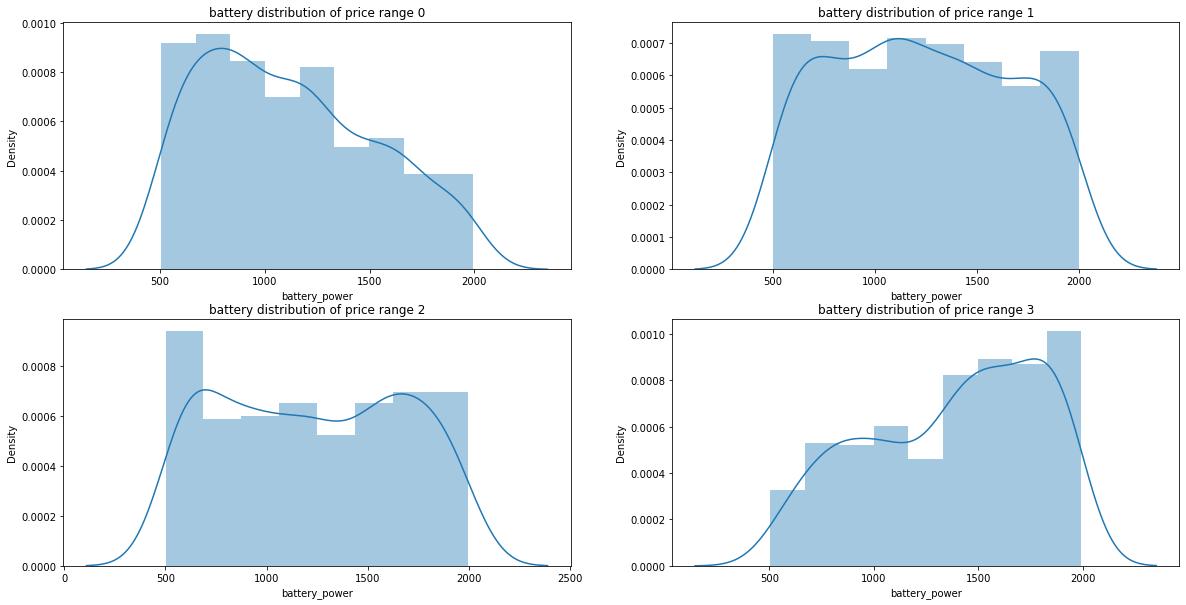

In [87]:
plt.figure(figsize = (20, 10))
plt.subplot(2,2,1)
sns.distplot(df_price_0['battery_power'])
plt.title('battery distribution of price range 0')
plt.subplot(2,2,2)
sns.distplot(df_price_1['battery_power'])
plt.title('battery distribution of price range 1')
plt.subplot(2,2,3)
sns.distplot(df_price_2['battery_power'])
plt.title('battery distribution of price range 2')
plt.subplot(2,2,4)
sns.distplot(df_price_3['battery_power'])
plt.title('battery distribution of price range 3')

# well the battery power distribution itself doesn't really tell a lot about how it correlated with price
# we can see that the pricerange 0 has more lower power battery product compared to other price range 
# since the distribution  is somehow right skewed 

### Pixel Height and Width

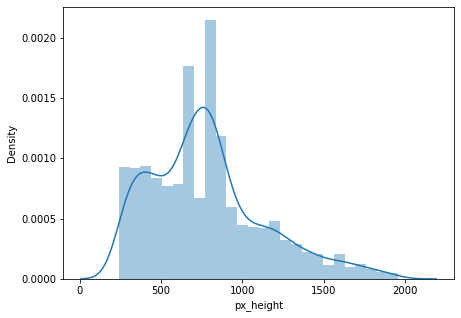

In [88]:
plt.figure(figsize = (7, 5))
sns.distplot(df['px_height'])
plt.show()

Text(0.5, 1.0, 'Pixel Height distribution of price range 3')

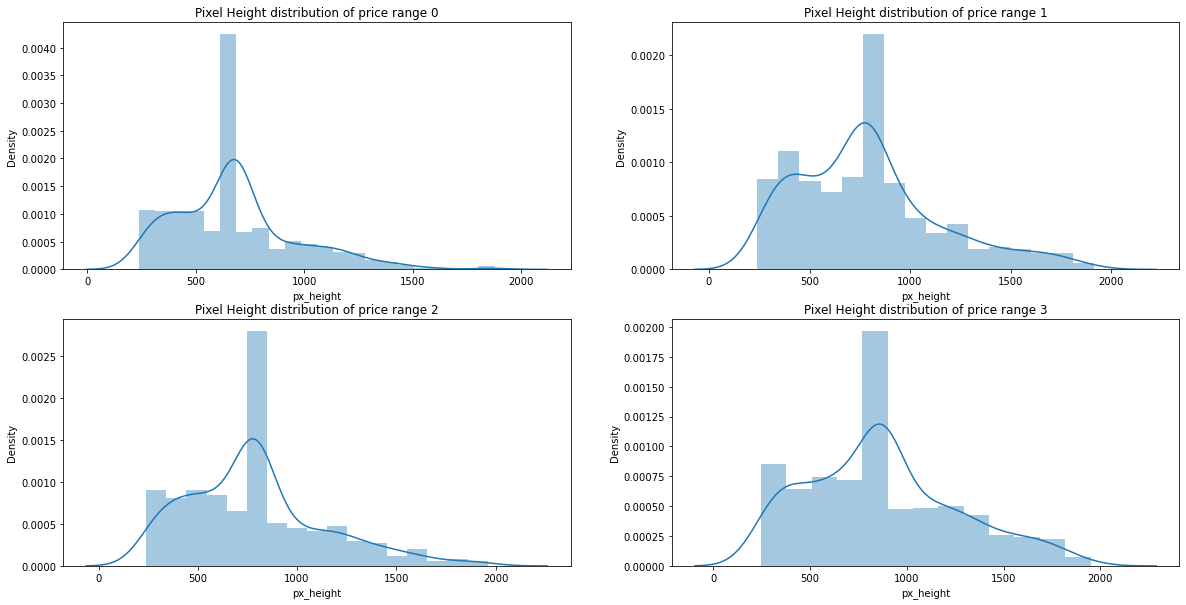

In [89]:
plt.figure(figsize = (20, 10))
plt.subplot(2,2,1)
sns.distplot(df_price_0['px_height'])
plt.title('Pixel Height distribution of price range 0')
plt.subplot(2,2,2)
sns.distplot(df_price_1['px_height'])
plt.title('Pixel Height distribution of price range 1')
plt.subplot(2,2,3)
sns.distplot(df_price_2['px_height'])
plt.title('Pixel Height distribution of price range 2')
plt.subplot(2,2,4)
sns.distplot(df_price_3['px_height'])
plt.title('Pixel Height distribution of price range 3')

# the pixel weight distribution is right skewed even after we subset it per price range 


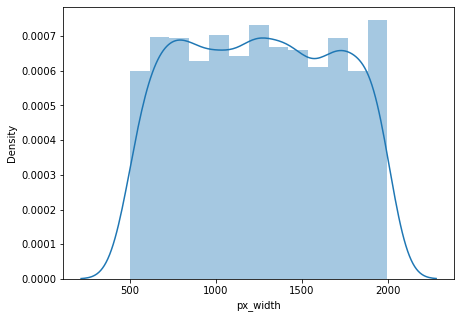

In [90]:
plt.figure(figsize = (7, 5))
sns.distplot(df['px_width'])
plt.show()

# compared to the pixel height the pixel width have a multimodal distribution
# and we will see how's the distribution per price range 

Text(0.5, 1.0, 'Pixel Width distribution of price range 3')

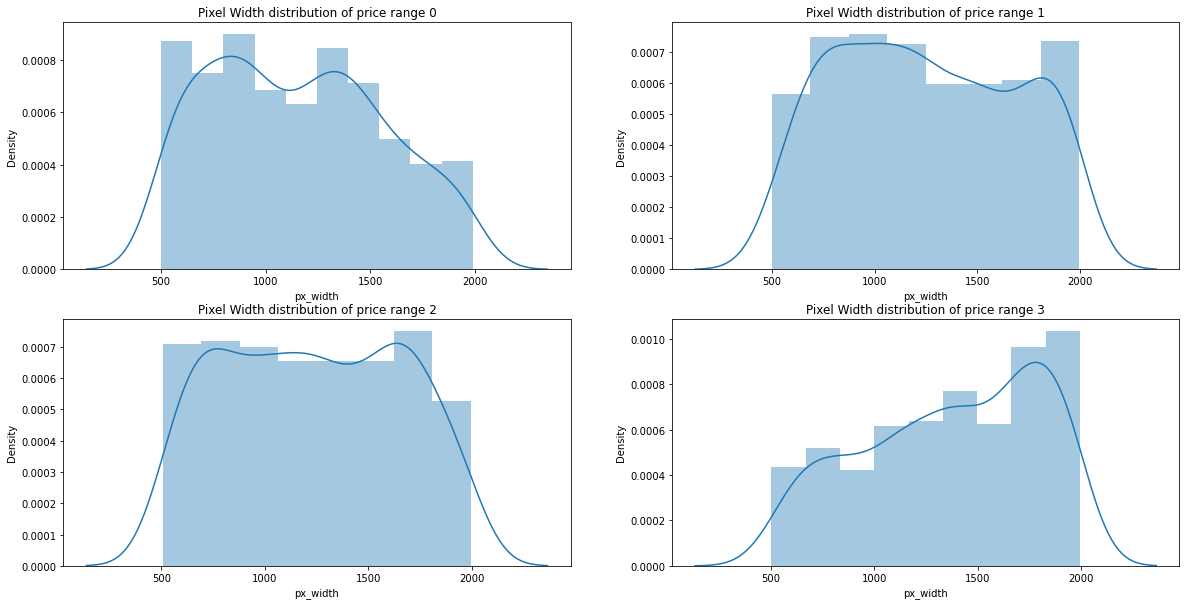

In [91]:
plt.figure(figsize = (20, 10))
plt.subplot(2,2,1)
sns.distplot(df_price_0['px_width'])
plt.title('Pixel Width distribution of price range 0')
plt.subplot(2,2,2)
sns.distplot(df_price_1['px_width'])
plt.title('Pixel Width distribution of price range 1')
plt.subplot(2,2,3)
sns.distplot(df_price_2['px_width'])
plt.title('Pixel Width distribution of price range 2')
plt.subplot(2,2,4)
sns.distplot(df_price_3['px_width'])
plt.title('Pixel Width distribution of price range 3')

# there's something interesting with pixel width
# we see that the price range of 0 has more product on the lower pixel width 
# while the highest price range has more products toward the higher end of pixel width 
# on the price range of 2 and 3 seems like the products is almost evenly distributed by px width

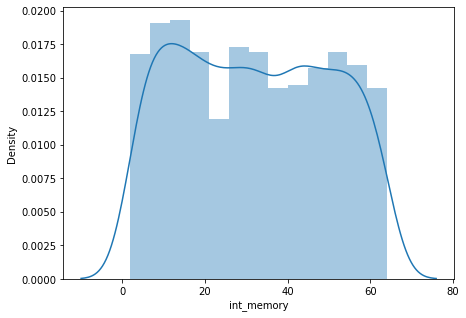

In [92]:
plt.figure(figsize = (7, 5))
sns.distplot(df['int_memory'])
plt.show()

Text(0.5, 1.0, 'Internal memory distribution of price range 3')

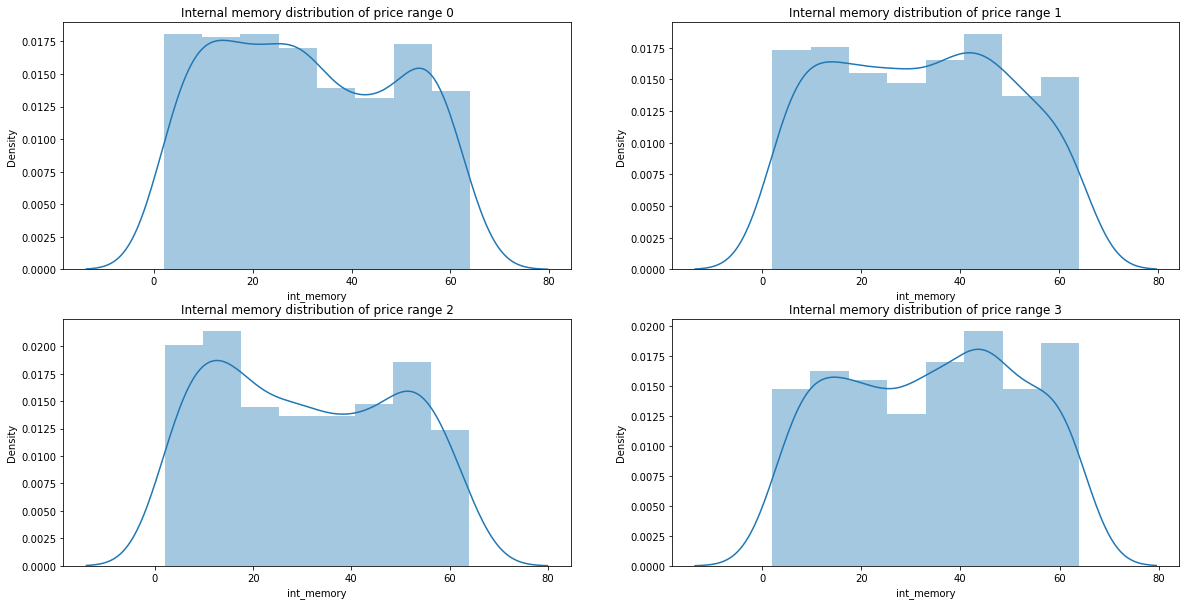

In [93]:
plt.figure(figsize = (20, 10))
plt.subplot(2,2,1)
sns.distplot(df_price_0['int_memory'])
plt.title('Internal memory distribution of price range 0')
plt.subplot(2,2,2)
sns.distplot(df_price_1['int_memory'])
plt.title('Internal memory distribution of price range 1')
plt.subplot(2,2,3)
sns.distplot(df_price_2['int_memory'])
plt.title('Internal memory distribution of price range 2')
plt.subplot(2,2,4)
sns.distplot(df_price_3['int_memory'])
plt.title('Internal memory distribution of price range 3')

## we can see that internal memory sizes doesn't have many difference when it comes to distribution
# per price range 

<AxesSubplot:xlabel='four_g', ylabel='count'>

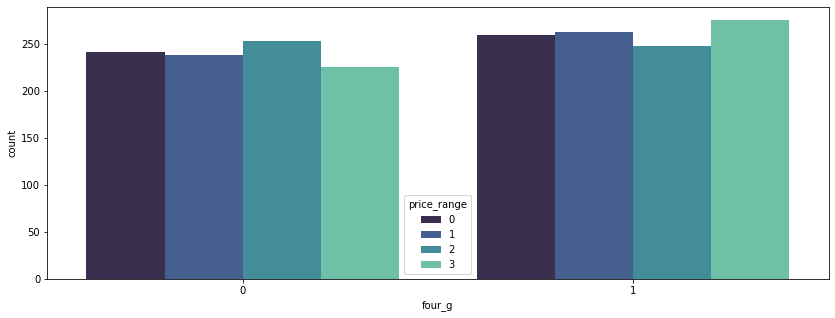

In [94]:
plt.figure(figsize = (14, 5))
sns.countplot(df['four_g'], palette = 'mako', hue = df['price_range'])

# there are slightly more phone with 4g line compared to non 4g line 
# phone with price range 3 has the most 4gline  among all group

<AxesSubplot:xlabel='three_g', ylabel='count'>

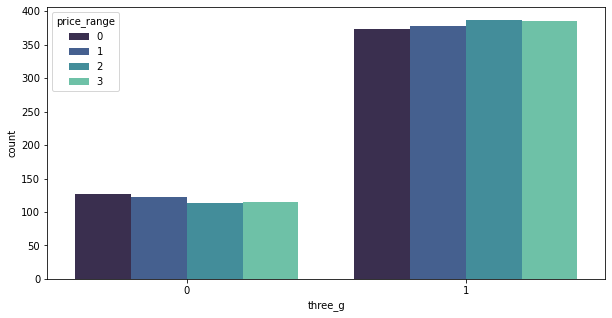

In [95]:
plt.figure(figsize = (10, 5))
sns.countplot(df['three_g'], palette = 'mako', hue = df['price_range'])



<AxesSubplot:xlabel='price_range', ylabel='clock_speed'>

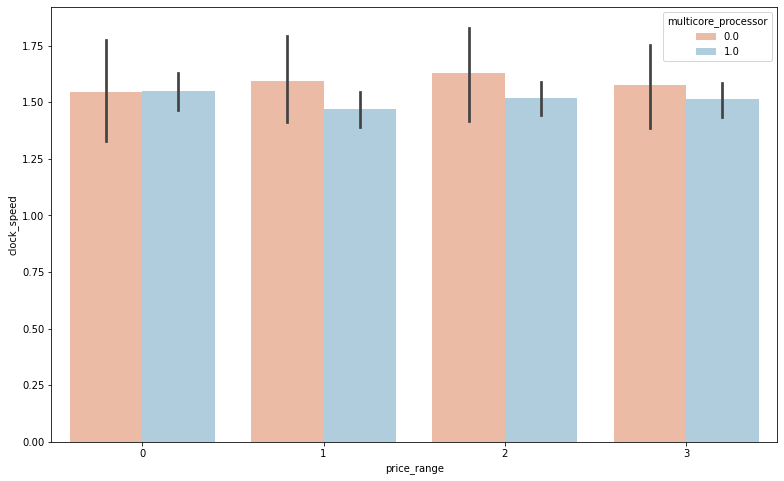

In [96]:
# Processor and price Range

plt.figure(figsize = (13, 8))

sns.barplot(df['price_range'], df['clock_speed'], hue= df['multicore_processor'], palette = 'RdBu')

# singlecore processor has a faster avg clock speed compared to multicore processor in all price range 

<AxesSubplot:xlabel='price_range', ylabel='ram'>

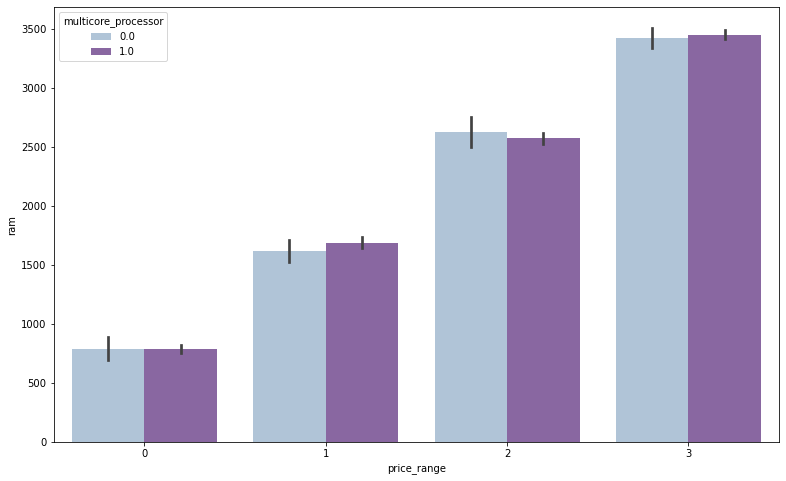

In [97]:
plt.figure(figsize = (13, 8))

sns.barplot(df['price_range'], df['ram'], hue= df['multicore_processor'], palette = 'BuPu')

# as from our analysis before that ramsize is highly correlated with the price range 
# the more expensive the price range the higher the ram a phone have 

### Multivariate Visualization


since from our analysis before we found out that RAM has the highest correlation for price range we are going to visualize independet variable with ram and price range 

In [98]:
df.head(1)

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   

   mobile_wt  n_cores  pc   px_height  px_width   ram  talk_time  three_g  \
0        188        2   2  786.934862       756  2549         19        0   

   touch_screen  wifi  price_range  is_fc  is_pc  screen_size screen_quality  \
0             0     1            1    1.0    1.0         4.49      HD Screen   

    ram_size        speed  multicore_processor primary_camera front_camera  
0  2 to 3 GB  upto 2.5GHz                  1.0       upto 4MP     upto 4MP

#### Battery Power Ram and Price Range

<AxesSubplot:xlabel='ram', ylabel='battery_power'>

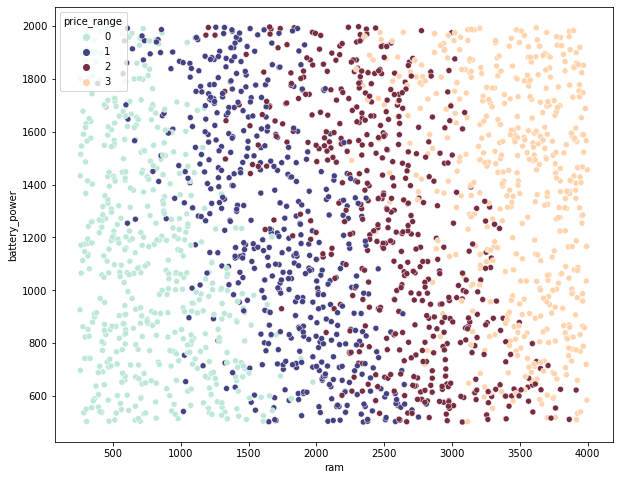

In [99]:
plt.figure(figsize = (10, 8))
sns.scatterplot(df['ram'], df['battery_power'], hue = df['price_range'], palette = 'icefire')

# we know froum our past analysis that ram affect the price range 
# however from the scatter plot below we can see that battery power vary for each ram sizes

<AxesSubplot:xlabel='price_range', ylabel='battery_power'>

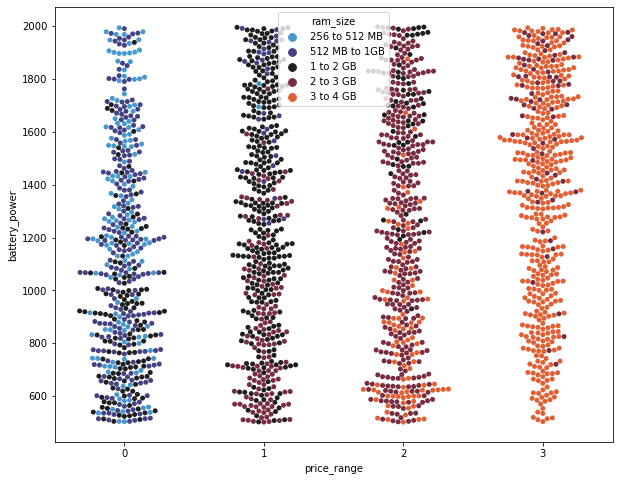

In [100]:
plt.figure(figsize = (10, 8))
sns.swarmplot(df['price_range'], df['battery_power'], hue = df['ram_size'], palette = 'icefire')

# phone with price range 3 more likely to have a higher battery power compared to phone in price 
# range 1 and 2 

### Ram, Price and Processor

<AxesSubplot:xlabel='price_range', ylabel='ram'>

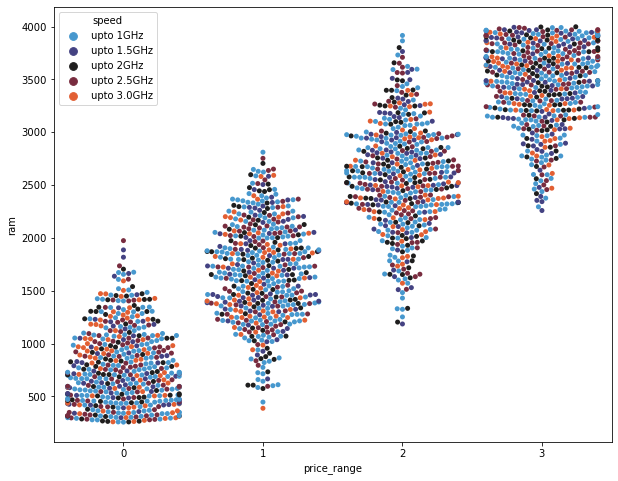

In [101]:
#clock speed and ram

plt.figure(figsize = (10, 8))
sns.swarmplot(df['price_range'], df['ram'], hue = df['speed'], palette = 'icefire')

# from this plot below we see many overlapping that even with small ram it's possible to have
# up to 3 GHz clock speed

<AxesSubplot:xlabel='n_cores', ylabel='ram'>

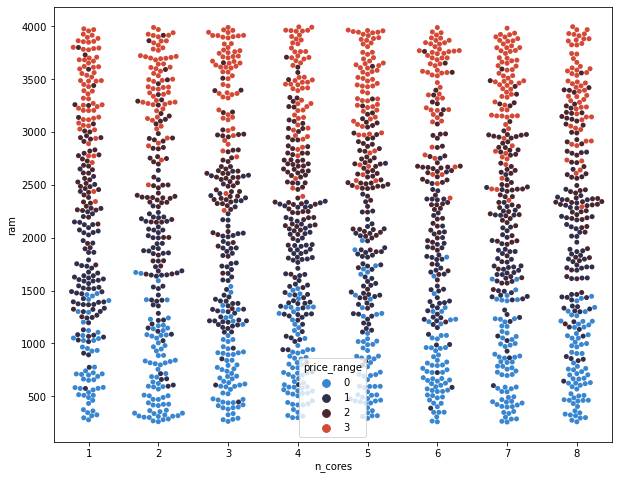

In [102]:
# number of cores ram and price range 

plt.figure(figsize = (10, 8))
sns.swarmplot(df['n_cores'], df['ram'], hue = df['price_range'], palette = 'icefire')

# this graph below shows that number of cores could vary in different size of ram
# you could have many cores and low ram
# or high ram with low number of cores 

# the only things that seems to affect the price is ram here

# from each number of cores the graphic looks the same means you could have phone in price range 0 
# with 8 number of cores or phone with price range of 3 with 1 core

<AxesSubplot:xlabel='multicore_processor', ylabel='ram'>

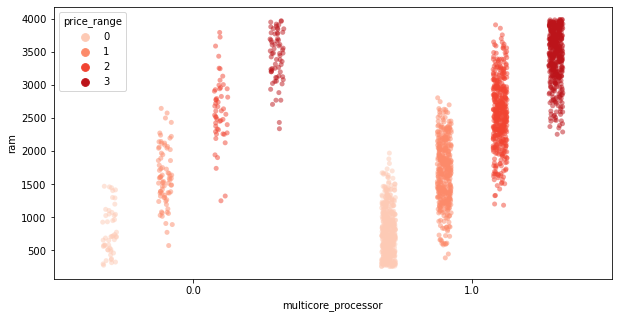

In [103]:
plt.figure(figsize = (10, 5))
sns.stripplot(df['multicore_processor'], df['ram'], hue = df['price_range'], dodge=True, alpha = 0.5, \
             palette = 'Reds')

# we can see here that multicore processor is more popular in all price range compared to singlecore
# however is not imposibble to have a single core processor in all price range with different size of ram

### Bluetooth Ram and price range 

<AxesSubplot:xlabel='blue', ylabel='ram'>

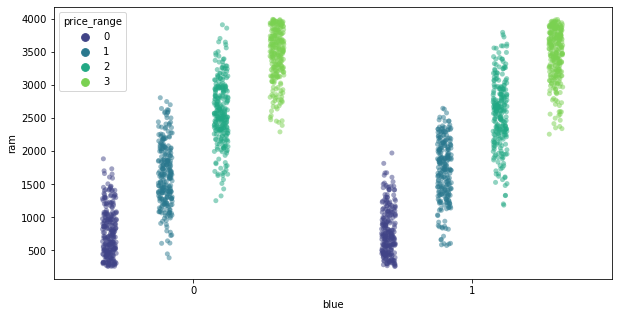

In [104]:
plt.figure(figsize = (10, 5))
sns.stripplot(df['blue'], df['ram'], hue = df['price_range'], dodge=True, jitter=True, alpha = 0.5, \
             palette = 'viridis')

# bluetooth seems to have no effect on ram and price range 
# phone with no bluetooth could have the same number of ram with phone that has bluetooth

### Dual sim, price and Ram

<AxesSubplot:xlabel='dual_sim', ylabel='ram'>

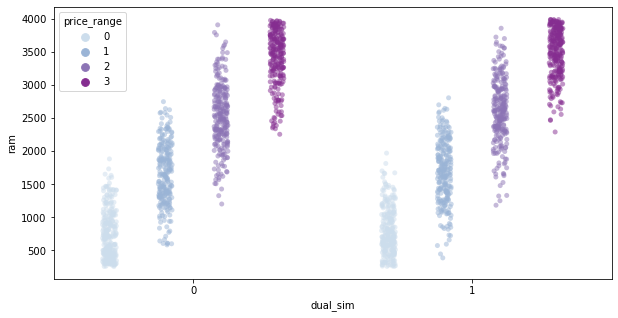

In [105]:
plt.figure(figsize = (10, 5))
sns.stripplot(df['dual_sim'], df['ram'], hue = df['price_range'], dodge=True, jitter=True, alpha = 0.5, \
             palette = 'BuPu')

# same goes to dual sim is seem that having dual sim doesn't affect the ram size or price range 


<AxesSubplot:xlabel='dual_sim', ylabel='count'>

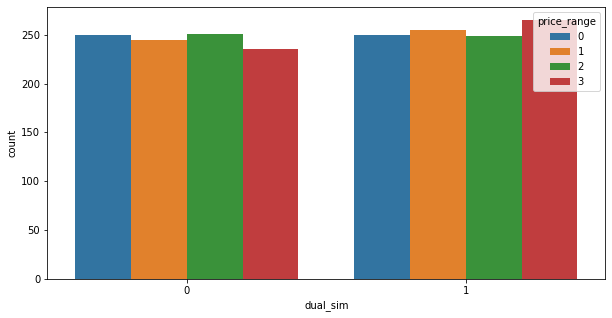

In [106]:
plt.figure(figsize = (10, 5))

sns.countplot(df['dual_sim'], hue = df['price_range'])

# there is no major difference in term of number of phones that has dual sim in every price range

<AxesSubplot:xlabel='dual_sim', ylabel='ram'>

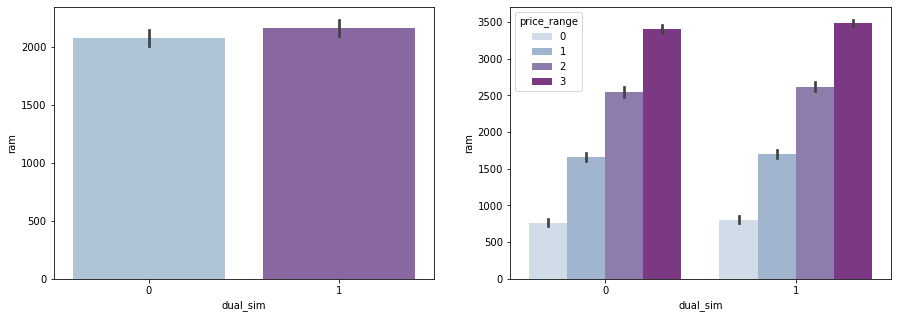

In [107]:
plt.figure(figsize = (15, 5))

plt.subplot(1,2,1)
sns.barplot(df['dual_sim'], y = df['ram'], palette = 'BuPu')

plt.subplot(1,2,2)
sns.barplot(df['dual_sim'], y = df['ram'], hue = df['price_range'], palette = 'BuPu')


#phone with dual sim have a slightly higher ram compared to non dual sim

### Memory and Ram, Price

<AxesSubplot:xlabel='ram', ylabel='int_memory'>

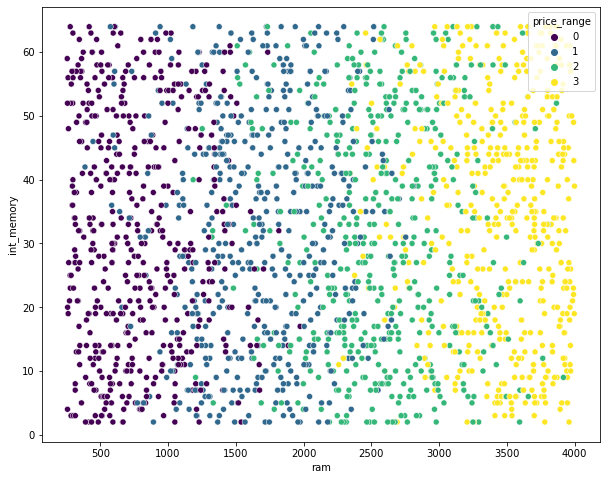

In [108]:
plt.figure(figsize = (10, 8))
sns.scatterplot(df['ram'], df['int_memory'], hue = df['price_range'], palette = 'viridis')

# number of memory and ram itseems doesn't have any correlation between each other 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62]),
 [Text(0, 0, '2'),
  Text(1, 0, '3'),
  Text(2, 0, '4'),
  Text(3, 0, '5'),
  Text(4, 0, '6'),
  Text(5, 0, '7'),
  Text(6, 0, '8'),
  Text(7, 0, '9'),
  Text(8, 0, '10'),
  Text(9, 0, '11'),
  Text(10, 0, '12'),
  Text(11, 0, '13'),
  Text(12, 0, '14'),
  Text(13, 0, '15'),
  Text(14, 0, '16'),
  Text(15, 0, '17'),
  Text(16, 0, '18'),
  Text(17, 0, '19'),
  Text(18, 0, '20'),
  Text(19, 0, '21'),
  Text(20, 0, '22'),
  Text(21, 0, '23'),
  Text(22, 0, '24'),
  Text(23, 0, '25'),
  Text(24, 0, '26'),
  Text(25, 0, '27'),
  Text(26, 0, '28'),
  Text(27, 0, '29'),
  Text(28, 0, '30'),
  Text(29, 0, '31'),
  Text(30, 0, '32'),
  Text(31, 0, '33'),
  Text(32, 0, '34'),
  Text(33, 0, '35'),
  Text(34, 0, '36'

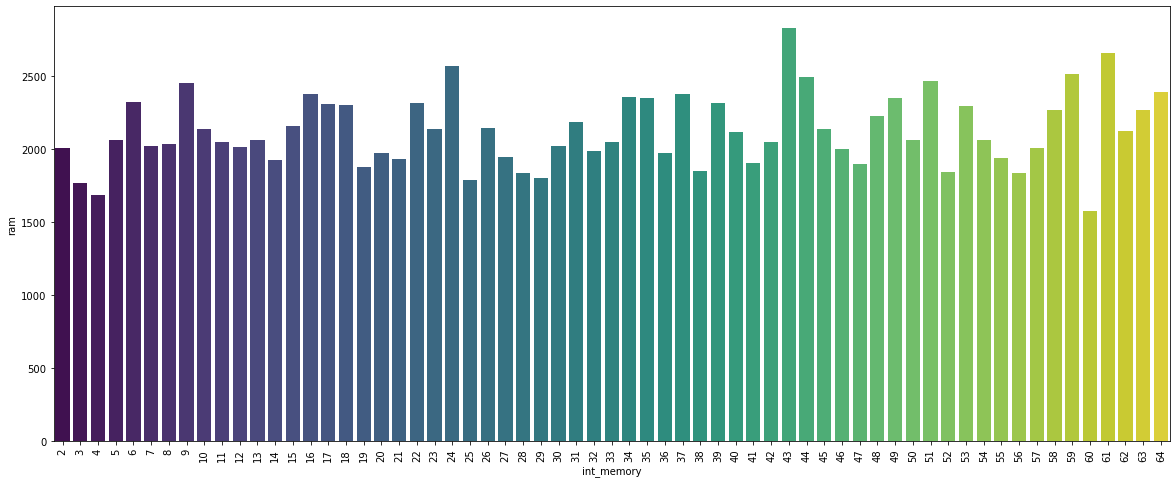

In [109]:
plt.figure(figsize = (20, 8))


sns.barplot(df['int_memory'], y = df['ram'], palette = 'viridis', ci = False)
plt.xticks(rotation = 90)

# the higher the memory size doesn't always means a higher ram
# the highest average ram is from phone that has an internal memory of 43

<AxesSubplot:xlabel='price_range', ylabel='int_memory'>

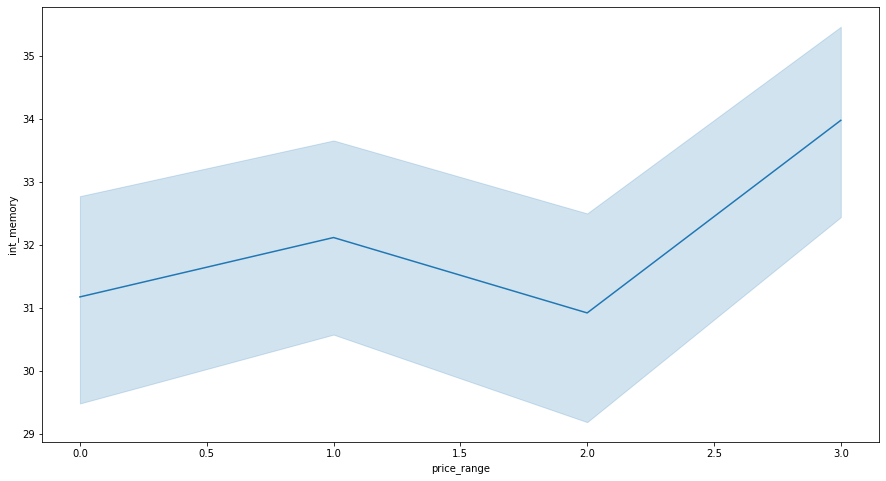

In [110]:
plt.figure(figsize = (15, 8))
sns.lineplot(df['price_range'], df['int_memory'], palette = 'mako')

# the average memory for all price range is kind of different 
# but looking at the trend down below 

# from price range 0 to 1 there's a slight increase in memory sizes 
# from price range 1 to 2 there's a descrease in memory sizes 
# while for the most expensive price range we see a major sharp incline in memory sizes 

### Cameras

**Primary Camera**

<AxesSubplot:xlabel='is_pc', ylabel='count'>

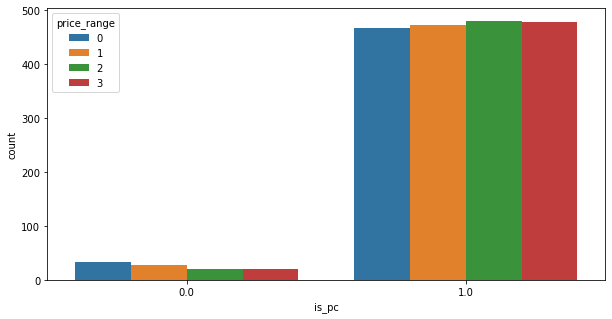

In [111]:
plt.figure(figsize = (10, 5))

sns.countplot(df['is_pc'], hue = df['price_range'])

# there's very low number of phone without back camera (primary camera)
# phone with 0 price range has the highest number of no primary camera

<AxesSubplot:xlabel='is_pc', ylabel='ram'>

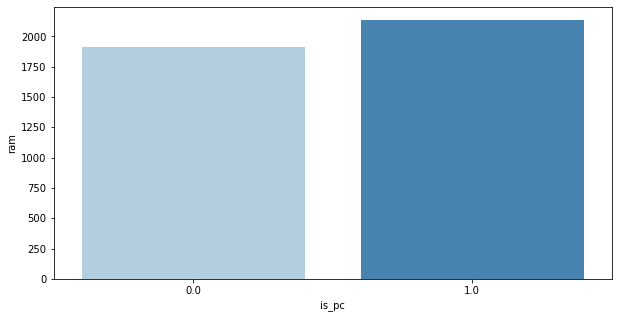

In [112]:
plt.figure(figsize = (10, 5))

sns.barplot(df['is_pc'], df['ram'], ci = False, palette = 'Blues')

# phone without primary camera has lower average ram compared to phone that has primary camera 
# this might be because phone with no camera majority are in price range 0 which is has a lower avg ram
# compared to the rest of the group 

<AxesSubplot:xlabel='pc', ylabel='ram'>

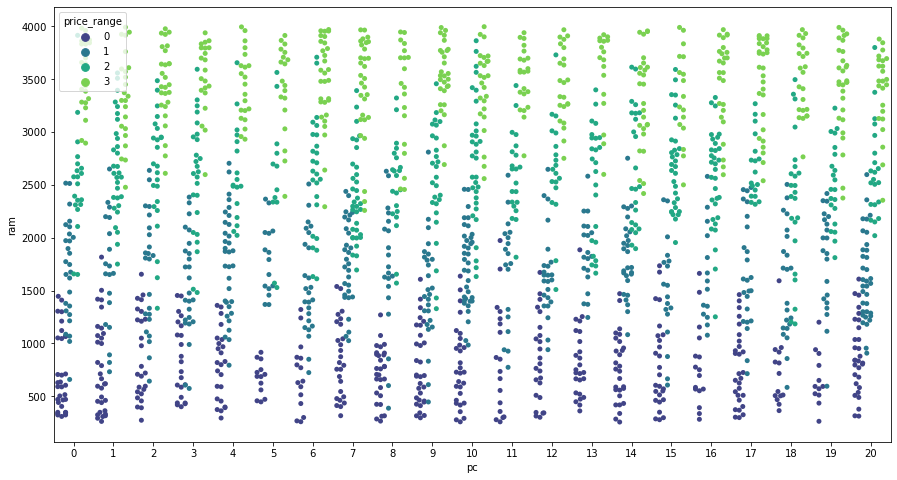

In [113]:
plt.figure(figsize = (15, 8))
sns.swarmplot(df['pc'], df['ram'], hue = df['price_range'], palette = 'viridis', dodge = True)


<AxesSubplot:xlabel='price_range', ylabel='pc'>

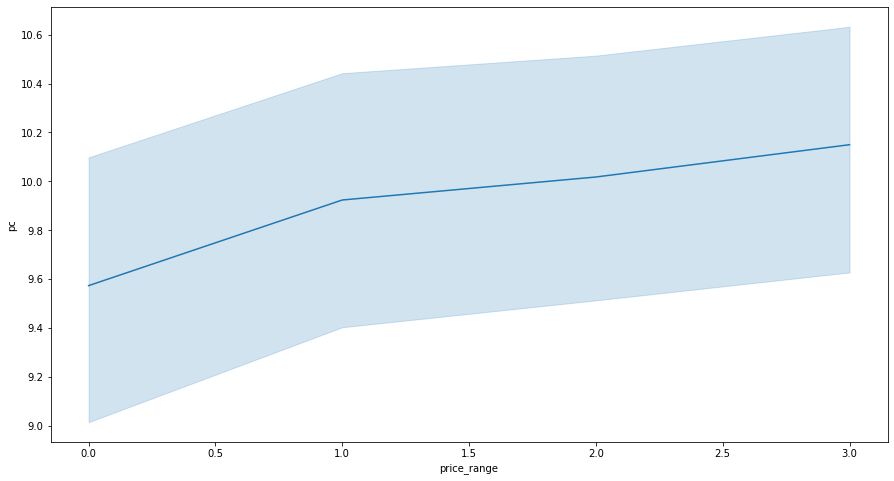

In [114]:
plt.figure(figsize = (15, 8))
sns.lineplot(df['price_range'], df['pc'], palette = 'mako')

# we can see that there's a slightly increase in average primary camera megapixel when the price range 
# increase 

### Front Camera

<AxesSubplot:xlabel='is_fc', ylabel='count'>

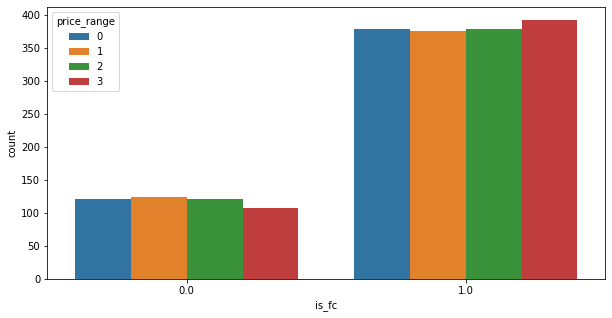

In [115]:
plt.figure(figsize = (10, 5))

sns.countplot(df['is_fc'], hue = df['price_range'])


<AxesSubplot:xlabel='is_fc', ylabel='ram'>

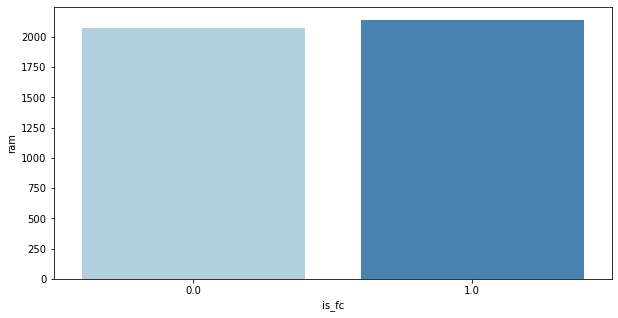

In [116]:
plt.figure(figsize = (10, 5))

sns.barplot(df['is_fc'], df['ram'], ci = False, palette = 'Blues')

# same analysis with primary camera

<AxesSubplot:xlabel='price_range', ylabel='fc'>

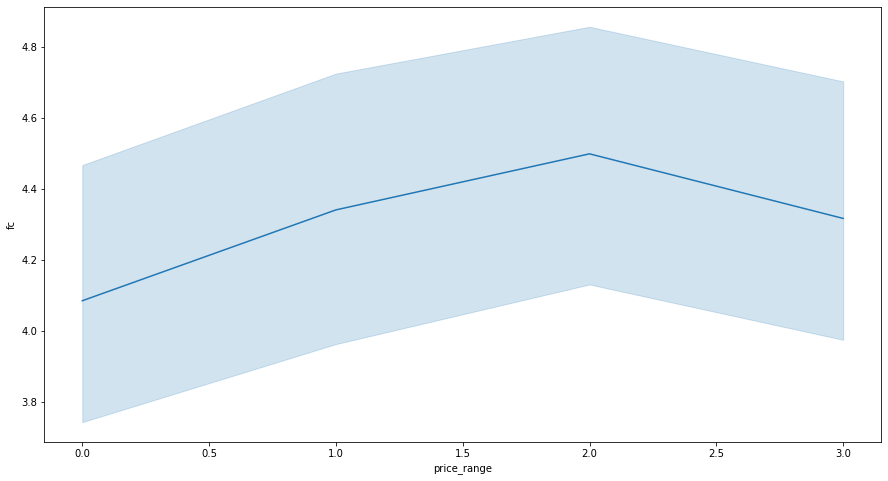

In [117]:
plt.figure(figsize = (15, 8))
sns.lineplot(df['price_range'], df['fc'], palette = 'mako')

# by looking at this graph the price range increase as the front camera increase 
# however the the average front camera megapixel drop when the price range goes from 2 to 3

### Screen

#### Pixel width and pixel height

Text(0.5, 1.0, 'Correlation between pixel width and height')

<Figure size 720x360 with 0 Axes>

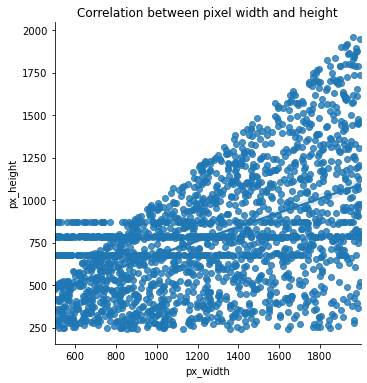

In [118]:
plt.figure(figsize = (10, 5))
sns.lmplot(x ='px_width', y ='px_height', data = df)
plt.title('Correlation between pixel width and height')



# we can see that pixel wifth and pixel height is positively correlated with each other 
# means in if one pixel value get higher the other pixel value most likely to follow

<AxesSubplot:xlabel='price_range', ylabel='px_width'>

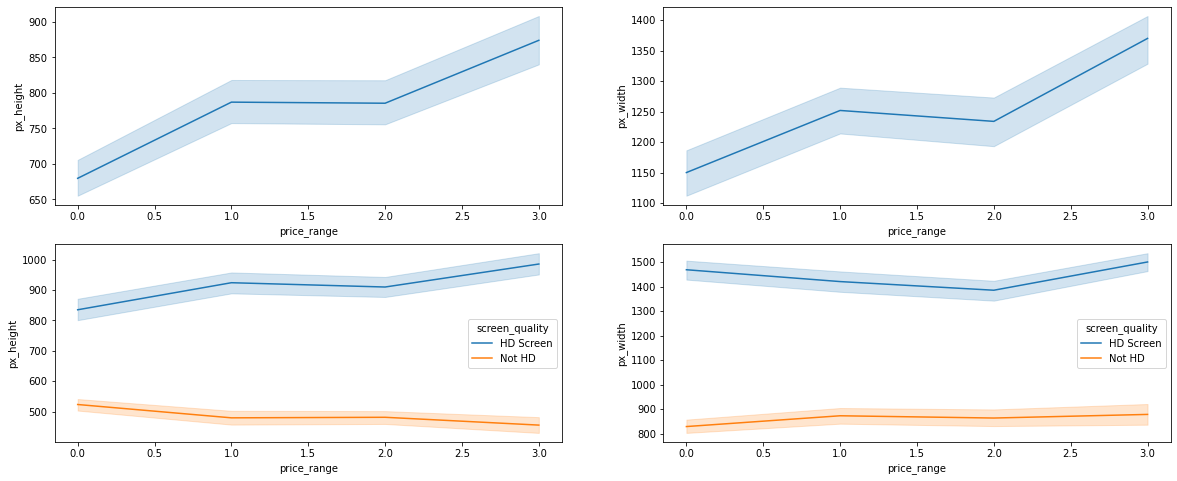

In [119]:
plt.figure(figsize = (20, 8))

plt.subplot(2,2,1)
sns.lineplot(x ='price_range', y ='px_height', data = df)
plt.subplot(2,2,2)
sns.lineplot(x ='price_range', y ='px_width', data = df)
plt.subplot(2,2,3)
sns.lineplot(x ='price_range', y ='px_height', hue= 'screen_quality', data = df)
plt.subplot(2,2,4)
sns.lineplot(x ='price_range', y ='px_width', data = df, hue = 'screen_quality')

# we can see that both pixel width and height value generally goes up as the price range goes up 
# so as the phone become more expensive it has a better screen quality

#however we see that price for non HD screen the pixel size generally stays the same even though it
# increases in price range

<AxesSubplot:xlabel='price_range', ylabel='screen_size'>

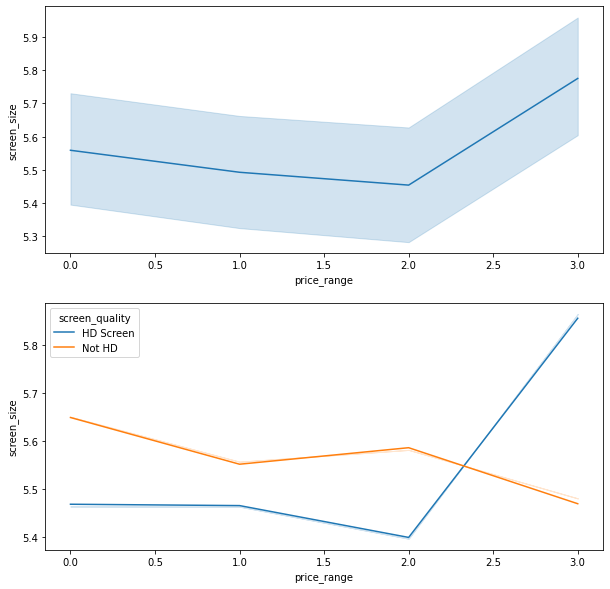

In [120]:
### screen size 

plt.figure(figsize = (10, 10))
plt.subplot(2,1,1)
sns.lineplot(x ='price_range', y ='screen_size', data = df)
plt.subplot(2,1,2)
sns.lineplot(x ='price_range', y ='screen_size', hue = 'screen_quality', data = df, ci = False)

# we can see that from price range 0 to 2 the trend for the screen size generally goes down
# however the screen size trend for the price range 3 tend to go up
# the price range 3 on average has a bigger screen size compared to the rest of the group

# if we split it into 2 different categories non hd screen and hd screen we can clearly view that
# hd screen size goes higher in average when  the price range is 3
# while for non hd screen the size is kind of fluctuatively goes up and down

# ML PART

In [121]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, recall_score,accuracy_score, precision_score, classification_report
import warnings 
warnings.filterwarnings('ignore')
import sidetable as stb
#from xgboost import XGBClassifier

In [122]:
pd.set_option('max_columns',None)

In [123]:
df = pd.read_csv('train.csv')

In [124]:
df.head()

# since all the data has been cleaned during the eda process we're going to focus on the machine learning process

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2   2         20       756  2549     9     7         19   
1        136        3   6        905      1988  2631    17     3          7   
2        145        5   6       1263      1716  2603    11     2          9   
3        131        6   9       1216      1786  2769    16     8         11   
4        141        2  14       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1

### Feature Engineering and encoding Process

#### Encoding the screen quality 

In [125]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [126]:
df.info()

# now all the data has been encoded we can move on with the process 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

<AxesSubplot:>

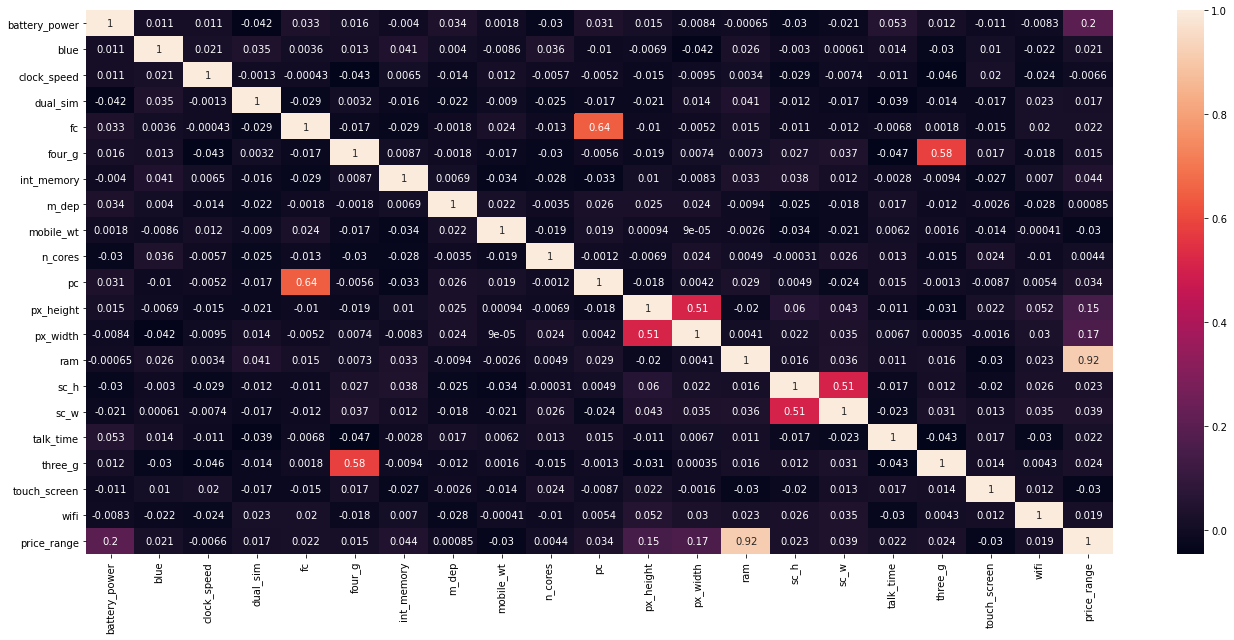

In [127]:
plt.figure(figsize = (23, 10))
sns.heatmap(df.corr(), annot = True)

In [128]:
correlation = df.corr()
correlation['price_range'].sort_values(ascending = False)[1:]

# the features that's going to get selected is 
# - ram
# - battery power
# - px_width
# - px_height
# - int_memory
# - is_pc

# we only select features that has correlation above 0.04 or below 0.04
# some features not selected due to multicolinearity 

ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64

## Features Selection and Model Building

In [129]:
X = df[['ram', 'battery_power', 'px_height','px_width', 'int_memory']]
y = df['price_range']

# - ram
# - battery power
# - px_width
# - px_height
# - int_memory
# - is_pc


**Train Test Split**

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y, random_state  = 42 , test_size = 0.2)

## Base Model

**Logistic Regression**

In [131]:
log_reg = LogisticRegression()

In [132]:
log_reg.fit(X_train,y_train)

LogisticRegression()

In [133]:
y_logreg_base = log_reg.predict(X_test)

In [134]:
## checking score of the logistic regression

logreg_base_train = log_reg.score(X_train, y_train)

print('train accuracy: ', log_reg.score(X_train, y_train))
print('test accuracy: ', log_reg.score(X_test, y_test))

train accuracy:  0.545625
test accuracy:  0.55


In [135]:
acc_base_logreg = accuracy_score(y_test, y_logreg_base)
recall_base_logreg = recall_score(y_test, y_logreg_base, average = None)
precision_base_logreg = precision_score(y_test, y_logreg_base, average = None)
f1_base_logreg = f1_score(y_test, y_logreg_base, average = None)

print(classification_report(y_test, y_logreg_base))

              precision    recall  f1-score   support

           0       0.82      0.75      0.78       100
           1       0.43      0.42      0.43       100
           2       0.39      0.31      0.34       100
           3       0.55      0.72      0.62       100

    accuracy                           0.55       400
   macro avg       0.55      0.55      0.54       400
weighted avg       0.55      0.55      0.54       400



Text(0.5, 1.0, 'Confusion Matrix Logistic Regression Testing')

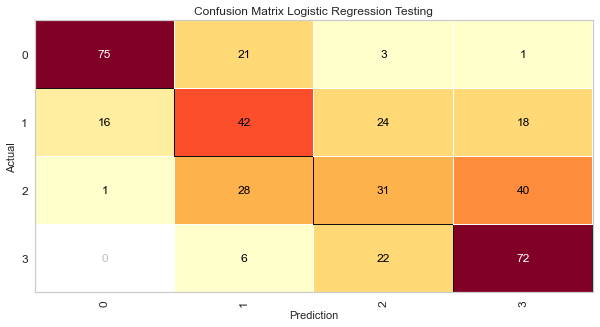

In [136]:
from yellowbrick.classifier import ConfusionMatrix

plt.figure(figsize = (10, 5))

cm_base_logreg = ConfusionMatrix(log_reg, classes = [0,1,2,3])
cm_base_logreg.fit(X_train, y_train)

cm_base_logreg.score(X_test, y_test)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix Logistic Regression Testing')

In [137]:
cm_logreg_base = confusion_matrix(y_test, y_logreg_base, labels = [0,1,2,3])

<AxesSubplot:>

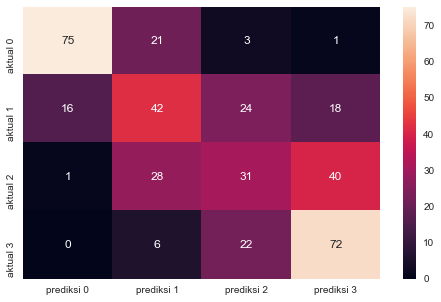

In [138]:
df_logreg_base = pd.DataFrame(data = cm_logreg_base, index = ['aktual 0', 'aktual 1', 'aktual 2', 'aktual 3'], columns = ['prediksi 0', 'prediksi 1', 'prediksi 2', 'prediksi 3'])
plt.figure(figsize = (8, 5))
sns.heatmap(df_logreg_base, annot = True)

### KNeighbors Classsifier

In [139]:
KNN_base = KNeighborsClassifier()
KNN_base.fit(X_train, y_train)
y_KNN_base = KNN_base.predict(X_test)

In [140]:
# training and testing score 
KNN_base_train = KNN_base.score(X_train, y_train)

print('train accuracy KNN base: ', KNN_base.score(X_train, y_train))
print('test accuracy KNN base: ', KNN_base.score(X_test, y_test))

train accuracy KNN base:  0.94375
test accuracy KNN base:  0.935


In [141]:
acc_base_KNN = accuracy_score(y_test, y_KNN_base)
recall_base_KNN = recall_score(y_test, y_KNN_base, average = None)
precision_base_KNN = precision_score(y_test, y_KNN_base, average = None)
f1_base_KNN = f1_score(y_test, y_KNN_base, average = None)

print(classification_report(y_test, y_KNN_base))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       100
           1       0.92      0.93      0.93       100
           2       0.90      0.87      0.88       100
           3       0.94      0.95      0.95       100

    accuracy                           0.94       400
   macro avg       0.93      0.94      0.93       400
weighted avg       0.93      0.94      0.93       400



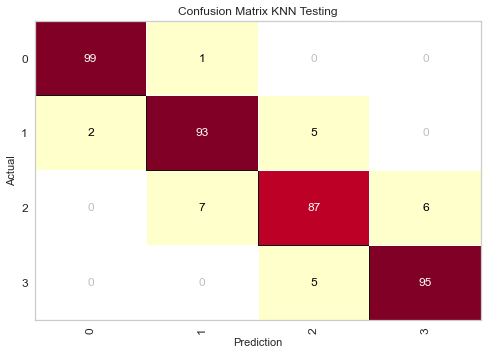

In [142]:
cm_base_KNN = ConfusionMatrix(KNN_base, classes = [0,1,2,3])
cm_base_KNN.fit(X_train, y_train)

cm_base_KNN.score(X_test, y_test)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix KNN Testing')
plt.show()

### SVC

In [143]:
SVC_base = SVC()
SVC_base.fit(X_train, y_train)
y_SVC_base = SVC_base.predict(X_test)

In [144]:
SVC_base_train = SVC_base.score(X_train, y_train)

print('train accuracy SVC base: ', SVC_base.score(X_train, y_train))
print('test accuracy SVC base: ', SVC_base.score(X_test, y_test))

train accuracy SVC base:  0.9525
test accuracy SVC base:  0.9675


In [145]:
acc_base_SVC = accuracy_score(y_test, y_SVC_base)
recall_base_SVC = recall_score(y_test, y_SVC_base, average = None)
precision_base_SVC = precision_score(y_test, y_SVC_base, average = None)
f1_base_SVC = f1_score(y_test, y_SVC_base, average = None)

print(classification_report(y_test, y_SVC_base))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       100
           1       0.96      0.98      0.97       100
           2       0.96      0.92      0.94       100
           3       0.96      0.97      0.97       100

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



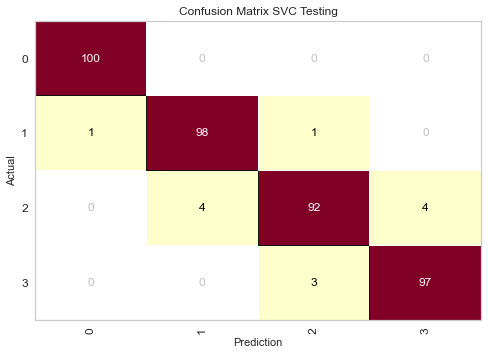

In [146]:
cm_base_SVC = ConfusionMatrix(SVC_base, classes = [0,1,2,3])
cm_base_SVC.fit(X_train, y_train)

cm_base_SVC.score(X_test, y_test)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix SVC Testing')
plt.show()

### Decision Tree

In [147]:
DT_base = DecisionTreeClassifier()
DT_base.fit(X_train, y_train)
y_DT_base = DT_base.predict(X_test)

In [148]:
DT_base_train = DT_base.score(X_train, y_train)

print('train accuracy Decision Tree base: ', DT_base.score(X_train, y_train))
print('test accuracy Decision Tree base: ', DT_base.score(X_test, y_test))

# we can clearly see that this model is overfitting looking at the difference from the training and test

train accuracy Decision Tree base:  1.0
test accuracy Decision Tree base:  0.89


In [149]:
acc_base_DT = accuracy_score(y_test, y_DT_base)
recall_base_DT = recall_score(y_test, y_DT_base, average = None)
precision_base_DT = precision_score(y_test, y_DT_base, average = None)
f1_base_DT = f1_score(y_test, y_DT_base, average = None)

print(classification_report(y_test, y_DT_base))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       100
           1       0.89      0.84      0.87       100
           2       0.81      0.88      0.85       100
           3       0.93      0.89      0.91       100

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400



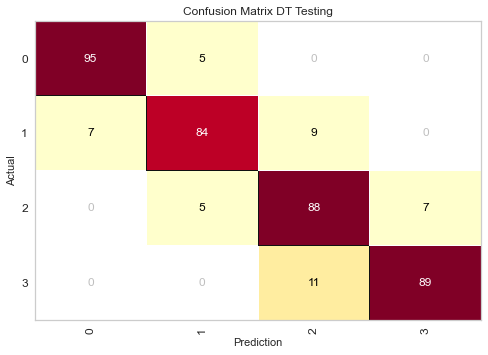

In [150]:
cm_base_DT = ConfusionMatrix(DT_base, classes = [0,1,2,3])
cm_base_DT.fit(X_train, y_train)

cm_base_DT.score(X_test, y_test)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix DT Testing')
plt.show()

### Random Forest

In [151]:
RF_base = RandomForestClassifier()
RF_base.fit(X_train, y_train)
y_RF_base = RF_base.predict(X_test)



In [152]:
RF_base_train = RF_base.score(X_train, y_train)

print('train accuracy Random Forest base: ', RF_base.score(X_train, y_train))
print('test accuracy Random Forest base: ', RF_base.score(X_test, y_test))

# we can see that this algorithm has an overfitting problem as well

train accuracy Random Forest base:  1.0
test accuracy Random Forest base:  0.9425


In [153]:
acc_base_RF = accuracy_score(y_test, y_RF_base)
recall_base_RF = recall_score(y_test, y_RF_base, average = None)
precision_base_RF = precision_score(y_test, y_RF_base, average = None)
f1_base_RF = f1_score(y_test, y_RF_base, average = None)

print(classification_report(y_test, y_RF_base))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       100
           1       0.93      0.90      0.91       100
           2       0.92      0.92      0.92       100
           3       0.97      0.97      0.97       100

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400



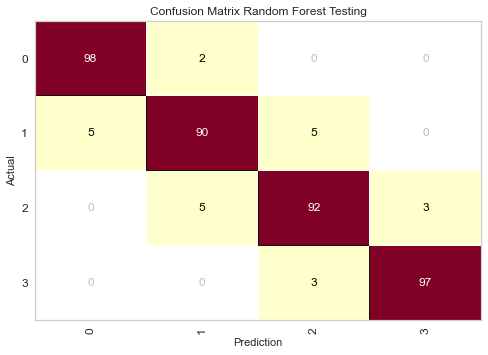

In [154]:
cm_base_RF = ConfusionMatrix(RF_base, classes = [0,1,2,3])
cm_base_RF.fit(X_train, y_train)

cm_base_RF.score(X_test, y_test)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix Random Forest Testing')
plt.show()

## Evaluation Matrix

In [155]:
cm_logreg_base = confusion_matrix(y_test, y_logreg_base, labels = [0,1,2,3])
cm_KNN_base = confusion_matrix(y_test, y_KNN_base, labels = [0,1,2,3])
cm_SVC_base = confusion_matrix(y_test, y_SVC_base, labels = [0,1,2,3])
cm_DT_base = confusion_matrix(y_test, y_DT_base, labels = [0,1,2,3])
cm_RF_base = confusion_matrix(y_test, y_RF_base, labels = [0,1,2,3])
#cm_XGB_base = confusion_matrix(y_test, y_XGB_base, labels = [0,1,2,3])




df_logreg_base = pd.DataFrame(data = cm_logreg_base, index = ['aktual 0', 'aktual 1', 'aktual 2', 'aktual 3'], columns = ['prediksi 0', 'prediksi 1', 'prediksi 2', 'prediksi 3'])
df_KNN_base = pd.DataFrame(data = cm_KNN_base, index = ['aktual 0', 'aktual 1', 'aktual 2', 'aktual 3'], columns = ['prediksi 0', 'prediksi 1', 'prediksi 2', 'prediksi 3'])
df_SVC_base = pd.DataFrame(data = cm_SVC_base, index = ['aktual 0', 'aktual 1', 'aktual 2', 'aktual 3'], columns = ['prediksi 0', 'prediksi 1', 'prediksi 2', 'prediksi 3'])
df_DT_base = pd.DataFrame(data = cm_DT_base, index = ['aktual 0', 'aktual 1', 'aktual 2', 'aktual 3'], columns = ['prediksi 0', 'prediksi 1', 'prediksi 2', 'prediksi 3'])
df_RF_base = pd.DataFrame(data = cm_RF_base, index = ['aktual 0', 'aktual 1', 'aktual 2', 'aktual 3'], columns = ['prediksi 0', 'prediksi 1', 'prediksi 2', 'prediksi 3'])
#df_XGB_base = pd.DataFrame(data = cm_XGB_base, index = ['aktual 0', 'aktual 1', 'aktual 2', 'aktual 3'], columns = ['prediksi 0', 'prediksi 1', 'prediksi 2', 'prediksi 3'])



In [156]:
evaluation_matrix_base = {'Training': [logreg_base_train, KNN_base_train,SVC_base_train,DT_base_train, RF_base_train],
                         'Testing':[acc_base_logreg, acc_base_KNN,acc_base_SVC,acc_base_DT,acc_base_RF]}

eva_base = pd.DataFrame(data = evaluation_matrix_base, index = ['Logistic Regression', 'KNN', 'SVC', 'Decision Tree', 'Random Forest'])
eva_base

# we can see from here that SVC has the best base model among all algortihm
# and from the base model there are 3 overfitting case in Decision Tree, Random Forest, and XGB
# among all the base model algorithm logistic regression has the worst performance 
# predicting the base model 

Training  Testing
Logistic Regression  0.545625   0.5500
KNN                  0.943750   0.9350
SVC                  0.952500   0.9675
Decision Tree        1.000000   0.8900
Random Forest        1.000000   0.9425

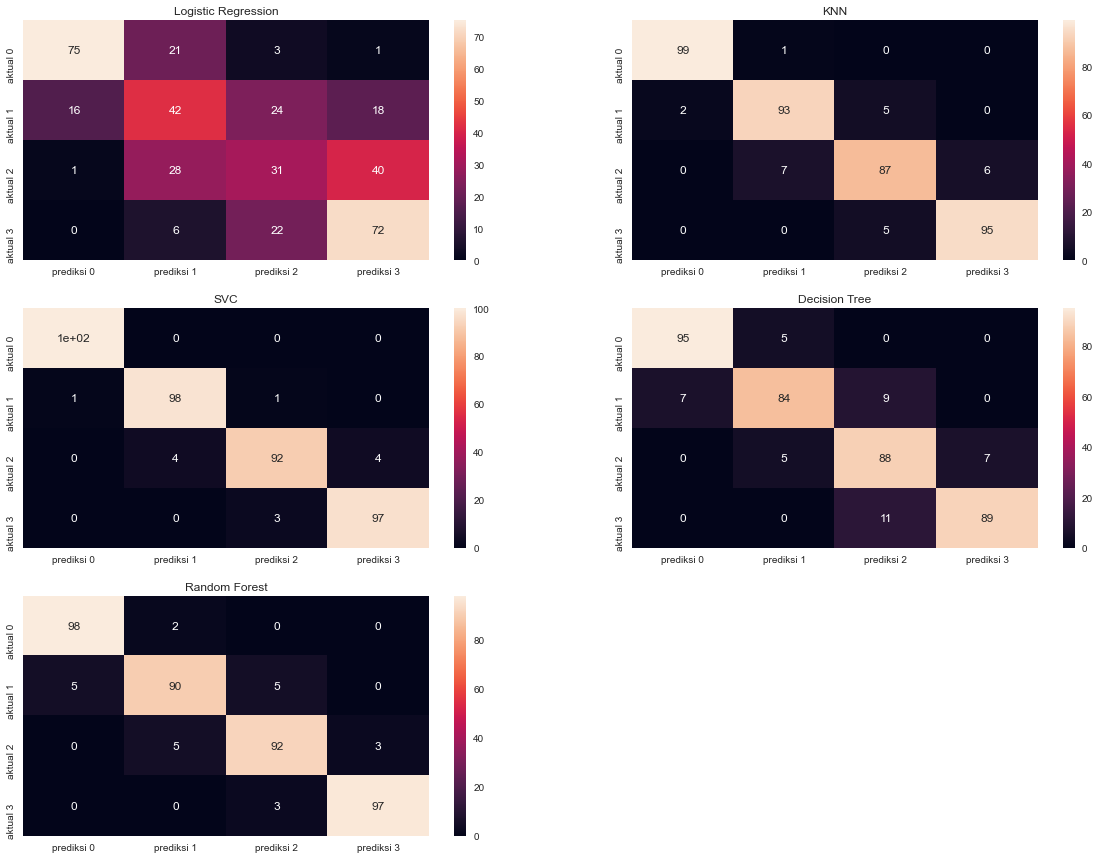

In [157]:
plt.figure(figsize = (20, 15))

plt.subplot(3,2,1)
sns.heatmap(df_logreg_base, annot = True)
plt.title('Logistic Regression')


plt.subplot(3,2,2)
sns.heatmap(df_KNN_base, annot = True)
plt.title('KNN')

plt.subplot(3,2,3)
sns.heatmap(df_SVC_base, annot = True)
plt.title('SVC')

plt.subplot(3,2,4)
sns.heatmap(df_DT_base, annot = True)
plt.title('Decision Tree')

plt.subplot(3,2,5)
sns.heatmap(df_RF_base, annot = True)
plt.title('Random Forest')

plt.show()

## Scaling

In [158]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

In [159]:
#scalling
minmax_scaler = MinMaxScaler()
X_train_scaled = minmax_scaler.fit_transform(X_train)
X_test_scaled = minmax_scaler.fit_transform(X_test)

# since there's a little amount of outliers we're going to use minmax scaler
# we scaled the train and the test value 

In [160]:
logreg_scaled = LogisticRegression()
logreg_scaled.fit(X_train_scaled, y_train)
y_logreg_scaled = logreg_scaled.predict(X_test_scaled)

In [161]:
logreg_scaled_train = logreg_scaled.score(X_train_scaled, y_train)
print('train accuracy Logistic Regression Scaled: ', logreg_scaled.score(X_train_scaled, y_train))
print('test accuracy Logistic Regression Scaled: ', logreg_scaled.score(X_test_scaled, y_test))

# wow looking at this logistic regression evaluation matrix jump up about 0.4 from base to scaled model


train accuracy Logistic Regression Scaled:  0.9375
test accuracy Logistic Regression Scaled:  0.9525


In [162]:
acc_scaled_logreg = accuracy_score(y_test, y_logreg_scaled)
recall_scaled_logreg = recall_score(y_test, y_logreg_scaled, average = None)
precision_scaled_logreg = precision_score(y_test, y_logreg_scaled, average = None)
f1_scaled_logreg = f1_score(y_test, y_logreg_scaled, average = None)

print(classification_report(y_test, y_logreg_scaled))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       100
           1       0.94      0.93      0.93       100
           2       0.95      0.90      0.92       100
           3       0.96      0.98      0.97       100

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



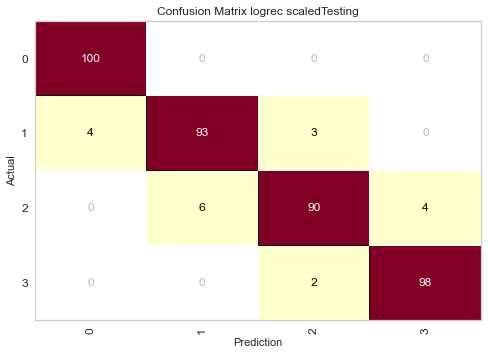

In [163]:
cm_scaled_logreg = ConfusionMatrix(logreg_scaled, classes = [0,1,2,3])
cm_scaled_logreg.fit(X_train_scaled, y_train)

cm_scaled_logreg.score(X_test_scaled, y_test)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix logrec scaledTesting')
plt.show()

### KNN Scaled

In [164]:
KNN_scaled = KNeighborsClassifier()
KNN_scaled.fit(X_train_scaled, y_train)
y_KNN_scaled = KNN_scaled.predict(X_test_scaled)

In [165]:
KNN_scaled_train = KNN_scaled.score(X_train_scaled, y_train)
print('train accuracy KNN Scaled: ', KNN_scaled.score(X_train_scaled, y_train))
print('test accuracy KNN Scaled: ', KNN_scaled.score(X_test_scaled, y_test))

# after the scaling KNN accuracy become lower and it become overfit

train accuracy KNN Scaled:  0.9075
test accuracy KNN Scaled:  0.8425


In [166]:
acc_scaled_KNN = accuracy_score(y_test, y_KNN_scaled)
recall_scaled_KNN = recall_score(y_test, y_KNN_scaled, average = None)
precision_scaled_KNN = precision_score(y_test, y_KNN_scaled, average = None)
f1_scaled_KNN = f1_score(y_test, y_KNN_scaled, average = None)

print(classification_report(y_test, y_KNN_scaled))

              precision    recall  f1-score   support

           0       0.96      0.89      0.92       100
           1       0.75      0.80      0.77       100
           2       0.75      0.79      0.77       100
           3       0.95      0.89      0.92       100

    accuracy                           0.84       400
   macro avg       0.85      0.84      0.84       400
weighted avg       0.85      0.84      0.84       400



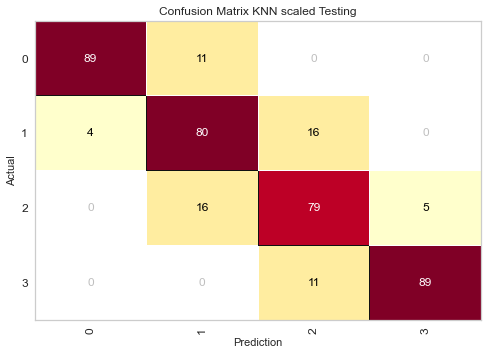

In [167]:
cm_scaled_KNN = ConfusionMatrix(KNN_scaled, classes = [0,1,2,3])
cm_scaled_KNN.fit(X_train_scaled, y_train)

cm_scaled_KNN.score(X_test_scaled, y_test)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix KNN scaled Testing')
plt.show()

### SVC Scaled

In [168]:
SVC_scaled = SVC()
SVC_scaled.fit(X_train_scaled, y_train)
y_SVC_scaled = SVC_scaled.predict(X_test_scaled)

In [169]:
SVC_scaled_train = SVC_scaled.score(X_train_scaled, y_train)
print('train accuracy SVC Scaled: ', SVC_scaled.score(X_train_scaled, y_train))
print('test accuracy SVC Scaled: ', SVC_scaled.score(X_test_scaled, y_test))

# svc evaluation matrix goes sligthly lower after scalling 

train accuracy SVC Scaled:  0.956875
test accuracy SVC Scaled:  0.945


In [170]:
acc_scaled_SVC = accuracy_score(y_test, y_SVC_scaled)
recall_scaled_SVC = recall_score(y_test, y_SVC_scaled, average = None)
precision_scaled_SVC = precision_score(y_test, y_SVC_scaled, average = None)
f1_scaled_SVC = f1_score(y_test, y_SVC_scaled, average = None)

print(classification_report(y_test, y_SVC_scaled))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       100
           1       0.94      0.95      0.95       100
           2       0.94      0.87      0.90       100
           3       0.92      0.97      0.95       100

    accuracy                           0.94       400
   macro avg       0.95      0.95      0.94       400
weighted avg       0.95      0.94      0.94       400



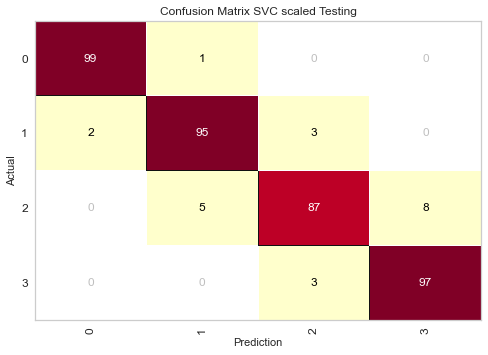

In [171]:
cm_scaled_SVC = ConfusionMatrix(SVC_scaled, classes = [0,1,2,3])
cm_scaled_SVC.fit(X_train_scaled, y_train)

cm_scaled_SVC.score(X_test_scaled, y_test)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix SVC scaled Testing')
plt.show()

# note we don't scale tree based algorithm since it doesn't required to be scaled

In [172]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
logreg_poly = LogisticRegression()
logreg_poly.fit(X_train_poly, y_train)
y_logreg_poly = logreg_poly.predict(X_test_poly)

In [173]:
logreg_poly_train = logreg_poly.score(X_train_poly, y_train)
print('train accuracy logreg poly Scaled: ', logreg_poly.score(X_train_poly, y_train))
print('test accuracy logreg poly Scaled: ', logreg_poly.score(X_test_poly, y_test))

# there's a slight increase in test accuracy score of logistic regression after polynomial  degree 2

train accuracy logreg poly Scaled:  0.951875
test accuracy logreg poly Scaled:  0.9675


In [174]:
acc_poly_logreg = accuracy_score(y_test, y_logreg_poly)
recall_poly_logreg = recall_score(y_test, y_logreg_poly, average = None)
precision_poly_logreg = precision_score(y_test, y_logreg_poly, average = None)
f1_poly_logreg = f1_score(y_test, y_logreg_poly, average = None)

print(classification_report(y_test, y_logreg_poly))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       100
           1       0.95      0.97      0.96       100
           2       0.97      0.92      0.94       100
           3       0.97      0.98      0.98       100

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



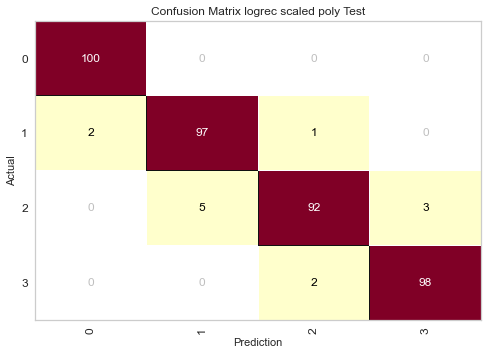

In [175]:
cm_poly_logreg = ConfusionMatrix(logreg_poly, classes = [0,1,2,3])
cm_poly_logreg.fit(X_train_poly, y_train)

cm_poly_logreg.score(X_test_poly, y_test)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix logrec scaled poly Test')
plt.show()

In [176]:


evaluation_matrix_featured = {'Training': [logreg_scaled_train, KNN_scaled_train,SVC_scaled_train,logreg_poly_train],
                         'Testing':[acc_scaled_logreg, acc_scaled_KNN,acc_scaled_SVC,acc_poly_logreg]}

eva_featured = pd.DataFrame(data = evaluation_matrix_featured, index = ['Logistic Regression Scaled', 'KNN Scaled', 'SVC Scaled', 'Linreg Scaled Poly'])
eva_featured


Training  Testing
Logistic Regression Scaled  0.937500   0.9525
KNN Scaled                  0.907500   0.8425
SVC Scaled                  0.956875   0.9450
Linreg Scaled Poly          0.951875   0.9675

# HEATMAP PICTURE

### HyperParameter Tuning


#### Logistic Regression

In [177]:
logreg_tuning = LogisticRegression()
param_logreg = {'C': [1, 0.5, 0.1, 5, 9],
               'penalty':['l2','l1', 'elasticnet']}

model_logreg_tuned = GridSearchCV(estimator = logreg_tuning, param_grid = param_logreg, cv = 5, n_jobs = -1 , verbose = 1, scoring = 'accuracy')
model_logreg_tuned.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1, 0.5, 0.1, 5, 9],
                         'penalty': ['l2', 'l1', 'elasticnet']},
             scoring='accuracy', verbose=1)

In [178]:
logreg_tuned = model_logreg_tuned.best_estimator_
y_tuned_logreg = logreg_tuned.predict(X_test_scaled)

In [179]:
logreg_tuned_train = logreg_tuned.score(X_train_scaled, y_train)
print('train accuracy logreg tuned Scaled: ', logreg_tuned.score(X_train_scaled, y_train))
print('test accuracy logreg tuned Scaled: ', logreg_tuned.score(X_test_scaled, y_test))

train accuracy logreg tuned Scaled:  0.96
test accuracy logreg tuned Scaled:  0.9725


In [180]:
acc_tuned_logreg = accuracy_score(y_test, y_tuned_logreg)

print(classification_report(y_test, y_tuned_logreg))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       0.97      0.98      0.98       100
           2       0.95      0.94      0.94       100
           3       0.97      0.97      0.97       100

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



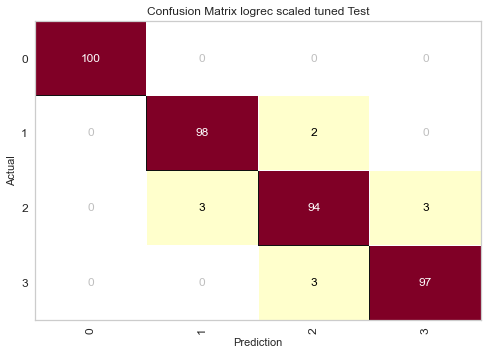

In [181]:
cm_tuned_logreg = ConfusionMatrix(logreg_tuned, classes = [0,1,2,3])
cm_tuned_logreg.fit(X_train_scaled, y_train)

cm_tuned_logreg.score(X_test_scaled, y_test)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix logrec scaled tuned Test')
plt.show()

### Polynom Logreg Tuning


In [182]:
logreg_tuning_poly = LogisticRegression()
param_logreg_poly = {'C': [1, 0.5, 0.1, 5, 9],
               'penalty':['l2','l1', 'elasticnet']}

model_logreg_tuned_poly = GridSearchCV(estimator = logreg_tuning_poly, param_grid = param_logreg_poly, cv = 5, n_jobs = -1 , verbose = 1, scoring = 'accuracy')
model_logreg_tuned_poly.fit(X_train_poly, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1, 0.5, 0.1, 5, 9],
                         'penalty': ['l2', 'l1', 'elasticnet']},
             scoring='accuracy', verbose=1)

In [183]:
logreg_tuned_poly = model_logreg_tuned_poly.best_estimator_
y_tuned_logreg_poly = logreg_tuned_poly.predict(X_test_poly)

In [184]:
logreg_tuned_train_poly = logreg_tuned_poly.score(X_train_poly, y_train)
print('train accuracy logreg tuned Scaled: ', logreg_tuned_poly.score(X_train_poly, y_train))
print('test accuracy logreg tuned Scaled: ', logreg_tuned_poly.score(X_test_poly, y_test))

train accuracy logreg tuned Scaled:  0.9625
test accuracy logreg tuned Scaled:  0.965


In [185]:
acc_logreg_tuned_poly = accuracy_score(y_test, y_tuned_logreg_poly)

print(classification_report(y_test, y_tuned_logreg_poly))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       100
           1       0.97      0.95      0.96       100
           2       0.93      0.94      0.94       100
           3       0.97      0.97      0.97       100

    accuracy                           0.96       400
   macro avg       0.97      0.96      0.96       400
weighted avg       0.97      0.96      0.96       400



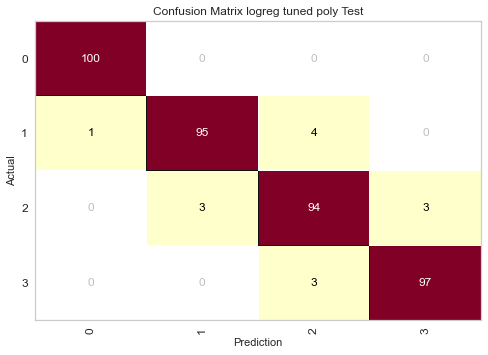

In [186]:
cm_tuned_logreg_poly = ConfusionMatrix(logreg_tuned_poly, classes = [0,1,2,3])
cm_tuned_logreg_poly.fit(X_train_poly, y_train)

cm_tuned_logreg_poly.score(X_test_poly, y_test)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix logreg tuned poly Test')
plt.show()

In [187]:
logreg_tuning_base = LogisticRegression()
param_logreg_base = {'C': [1, 0.5, 0.1, 5, 9],
               'penalty':['l2','l1', 'elasticnet']}

model_logreg_tuned_base = GridSearchCV(estimator = logreg_tuning_base, param_grid = param_logreg_base, cv = 5, n_jobs = -1 , verbose = 1, scoring = 'accuracy')
model_logreg_tuned_base.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1, 0.5, 0.1, 5, 9],
                         'penalty': ['l2', 'l1', 'elasticnet']},
             scoring='accuracy', verbose=1)

In [188]:
logreg_tuned_base = model_logreg_tuned_base.best_estimator_
y_tuned_logreg_base = logreg_tuned_base.predict(X_test)

In [189]:
logreg_tuned_train_base = logreg_tuned_base.score(X_train, y_train)
print('train accuracy logreg tuned Scaled: ', logreg_tuned_base.score(X_train, y_train))
print('test accuracy logreg tuned Scaled: ', logreg_tuned_base.score(X_test, y_test))

train accuracy logreg tuned Scaled:  0.548125
test accuracy logreg tuned Scaled:  0.5475


In [190]:
acc_logreg_tuned_base = accuracy_score(y_test, y_tuned_logreg_base)

print(classification_report(y_test, y_tuned_logreg_base))

              precision    recall  f1-score   support

           0       0.82      0.75      0.78       100
           1       0.43      0.42      0.42       100
           2       0.38      0.30      0.34       100
           3       0.55      0.72      0.62       100

    accuracy                           0.55       400
   macro avg       0.54      0.55      0.54       400
weighted avg       0.54      0.55      0.54       400



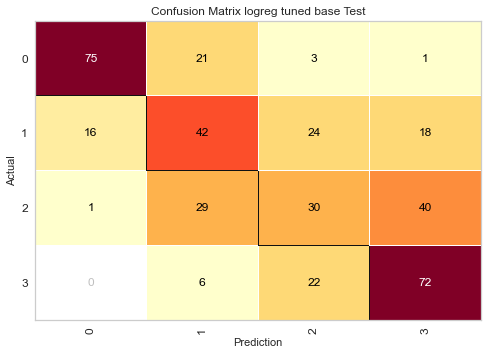

In [191]:
cm_tuned_logreg_base = ConfusionMatrix(logreg_tuned_base, classes = [0,1,2,3])
cm_tuned_logreg_base.fit(X_train, y_train)

cm_tuned_logreg_base.score(X_test, y_test)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix logreg tuned base Test')
plt.show()

### KNN Tuning


In [192]:
KNN_tuning = KNeighborsClassifier()
param_KNN = {'n_neighbors':[5,7,9,15, 30, 45,55 ],
               'weights':['uniform','distance'],
               'p':[2, 1],
            'algorithm': ['auto','ball_tree','kd_tree','brute'],
            'leaf_size':[30, 40, 50]}

model_KNN_tuned = GridSearchCV(estimator = KNN_tuning, param_grid = param_KNN, cv = 5, n_jobs = -1 , verbose = 1, scoring = 'accuracy')
model_KNN_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 336 candidates, totalling 1680 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [30, 40, 50],
                         'n_neighbors': [5, 7, 9, 15, 30, 45, 55], 'p': [2, 1],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [193]:
KNN_tuned = model_KNN_tuned.best_estimator_
y_tuned_KNN = KNN_tuned.predict(X_test)

In [194]:
KNN_tuned_train = KNN_tuned.score(X_train, y_train)
print('train accuracy KNN tuned : ', KNN_tuned.score(X_train, y_train))
print('test accuracy KNN tuned : ', KNN_tuned.score(X_test, y_test))

# there is an increase in the test score of non scaled KNN however we see that there is overfitting problem

train accuracy KNN tuned :  1.0
test accuracy KNN tuned :  0.9475


In [195]:
acc_KNN_tuned = accuracy_score(y_test, y_tuned_KNN)

print(classification_report(y_test, y_tuned_KNN))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       100
           1       0.94      0.92      0.93       100
           2       0.92      0.90      0.91       100
           3       0.96      0.97      0.97       100

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



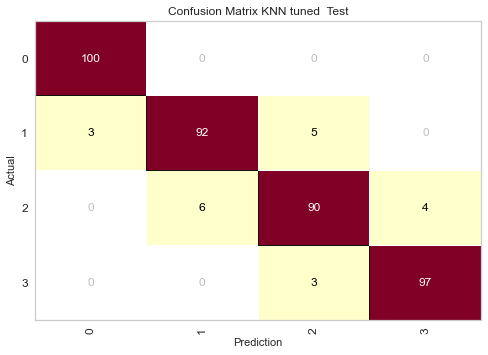

In [196]:
cm_tuned_KNN = ConfusionMatrix(KNN_tuned, classes = [0,1,2,3])
cm_tuned_KNN.fit(X_train, y_train)

cm_tuned_KNN.score(X_test, y_test)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix KNN tuned  Test')
plt.show()

### KNN Scaled Tuning

In [197]:
KNN_tuning_scaled = KNeighborsClassifier()
param_KNN_scaled = {'n_neighbors':[5,7,9,15, 30, 45,55 ],
               'weights':['uniform','distance'],
               'p':[2, 1],
            'algorithm': ['auto','ball_tree','kd_tree','brute'],
            'leaf_size':[30, 40, 50]}

model_KNN_tuned_scaled = GridSearchCV(estimator = KNN_tuning_scaled, param_grid = param_KNN_scaled, cv = 5, n_jobs = -1 , verbose = 1, scoring = 'accuracy')
model_KNN_tuned_scaled.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 336 candidates, totalling 1680 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [30, 40, 50],
                         'n_neighbors': [5, 7, 9, 15, 30, 45, 55], 'p': [2, 1],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [198]:
KNN_tuned_scaled = model_KNN_tuned_scaled.best_estimator_
y_tuned_KNN_scaled = KNN_tuned_scaled.predict(X_test_scaled)

In [199]:
KNN_tuned_train_scaled = KNN_tuned_scaled.score(X_train_scaled, y_train)
print('train accuracy KNN scaled tuned : ', KNN_tuned_scaled.score(X_train_scaled, y_train))
print('test accuracy KNN scaled tuned : ', KNN_tuned_scaled.score(X_test_scaled, y_test))

# we can see that even after scaling we still have overfitting for the KNN 
# and the tuning with no scaling still have a better accuracy score compareed to the scaled version

train accuracy KNN scaled tuned :  1.0
test accuracy KNN scaled tuned :  0.9225


In [200]:
acc_KNN_tuned_scaled = accuracy_score(y_test, y_tuned_KNN_scaled)

print(classification_report(y_test, y_tuned_KNN_scaled))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       100
           1       0.91      0.90      0.90       100
           2       0.84      0.86      0.85       100
           3       0.95      0.93      0.94       100

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400



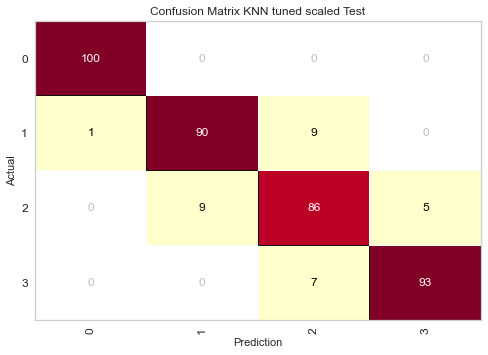

In [201]:
cm_tuned_KNN_scaled = ConfusionMatrix(KNN_tuned_scaled, classes = [0,1,2,3])
cm_tuned_KNN_scaled.fit(X_train_scaled, y_train)

cm_tuned_KNN_scaled.score(X_test_scaled, y_test)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix KNN tuned scaled Test')
plt.show()

## SVC Tuning

In [202]:
SVC_tuned = SVC()
param_SVC_tuned = {'C':[1.0, 2.0, 3.0, 1.5],
               'kernel':['rbf','poly','sigmoid','linear'],
               'degree':[3, 2, 4, 5],
               'gamma':['scale','auto'],
               'coef0':[0.0,0.2,0.5,1.0],
               'class_weight':[None,'balanced'],
               'decision_function_shape':['ovr','ovo']}

model_SVC_tuned = RandomizedSearchCV(estimator = SVC_tuned, param_distributions= param_SVC_tuned, scoring = 'accuracy', n_jobs = -1, cv = 5, verbose = 1)
model_SVC_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


KeyboardInterrupt: 

In [ ]:
SVC_tuned = model_SVC_tuned.best_estimator_
y_SVC_tuned = SVC_tuned.predict(X_test)

In [ ]:
SVC_tuned_train = SVC_tuned.score(X_train, y_train)

print('train accuracy SVC tuned : ', SVC_tuned.score(X_train, y_train))
print('test accuracy SVC tuned : ', SVC_tuned.score(X_test, y_test))

# the result of tuned SVC has a slightly better score compared to the base model of SVC


In [ ]:
acc_tuned_SVC = accuracy_score(y_test, y_SVC_tuned)

print(classification_report(y_test, y_SVC_tuned))

In [ ]:
cm_tuned_SVC = ConfusionMatrix(SVC_tuned, classes = [0,1,2,3])
cm_tuned_SVC.fit(X_train, y_train)

cm_tuned_SVC.score(X_test, y_test)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix SVC tuned  Test')
plt.show()

**Tuning Scaled SVC**

In [ ]:
SVC_tuned_scaled = SVC()
param_SVC_tuned_scaled = {'C':[1.0, 2.0, 3.0, 1.5],
               'kernel':['rbf','poly','sigmoid','linear'],
               'degree':[3, 2, 4, 5],
               'gamma':['scale','auto'],
               'coef0':[0.0,0.2,0.5,1.0],
               'class_weight':[None,'balanced'],
               'decision_function_shape':['ovr','ovo']}

model_SVC_tuned_scaled = RandomizedSearchCV(estimator = SVC_tuned, param_distributions= param_SVC_tuned, scoring = 'accuracy', n_jobs = -1, cv = 5, verbose = 1)
model_SVC_tuned_scaled.fit(X_train_scaled, y_train)

In [ ]:
SVC_tuned_scaled = model_SVC_tuned_scaled.best_estimator_
y_SVC_tuned_scaled = SVC_tuned_scaled.predict(X_test_scaled)

In [ ]:
SVC_tuned_train_scaled = SVC_tuned_scaled.score(X_train_scaled, y_train)

print('train accuracy SVC tuned scaled : ', SVC_tuned_scaled.score(X_train_scaled, y_train))
print('test accuracy SVC tuned scaled: ', SVC_tuned_scaled.score(X_test_scaled, y_test))


# the scaled svc has a better score compared to the regular scaled svc and it has a better score
# than scaled svc however the tuned non scaled svc have a better tuning score compared to the scaled
# one

In [ ]:
acc_tuned_SVC_scaled = accuracy_score(y_test, y_SVC_tuned_scaled)

print(classification_report(y_test, y_SVC_tuned_scaled))

In [ ]:
cm_tuned_SVC_scaled = ConfusionMatrix(SVC_tuned_scaled, classes = [0,1,2,3])
cm_tuned_SVC_scaled.fit(X_train_scaled, y_train)

cm_tuned_SVC_scaled.score(X_test_scaled, y_test)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix SVC scaled tuned  Test')
plt.show()

## Decision Tree Tuning

In [ ]:
decision_tree_tuned = DecisionTreeClassifier()
param_DT_tuned = {'criterion': ['gini','entropy'],
                 'splitter':['best', 'random'],
                 'max_depth':[None, 2, 6, 8, 12],
                 'min_samples_split':[2,4,6,1,5],
                 'min_samples_leaf':[1, 2, 4, 6],
                 'max_features': [None, 'auto', 'sqrt', 'log2']}

model_DT_tuned = GridSearchCV(decision_tree_tuned, param_DT_tuned, cv = 5, scoring = 'accuracy', verbose = 1, n_jobs = -1)
model_DT_tuned.fit(X_train, y_train)

In [ ]:
DT_tuned = model_DT_tuned.best_estimator_
y_DT_tuned = DT_tuned.predict(X_test)

In [ ]:
DT_tuned_train = DT_tuned.score(X_train,y_train)

print('Training Score for DT tuned model: ', DT_tuned.score(X_train,y_train))
print('Testing Score for DT tuned model: ', DT_tuned.score(X_test, y_test))

#there is a slight increase from the model however the model is still overfitting 

In [ ]:
acc_tuned_DT = accuracy_score(y_test, y_DT_tuned)

print(classification_report(y_test, y_DT_tuned))

In [ ]:
## confusion matrix 

cm_tuned_DT = ConfusionMatrix(DT_tuned, classes = [0,1,2,3])
cm_tuned_DT.fit(X_train, y_train)

cm_tuned_DT.score(X_test, y_test)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix DT tuned  Test')
plt.show()

# most error happened when predicting phone in price range 1 

## Random Forest Tuning

In [ ]:
random_forest_tuned = RandomForestClassifier()
param_RF_tuned = {'criterion': ['gini','entropy'],
                 'max_depth':[None, 2, 6, 8, 12],
                 'min_samples_split':[2,4,6,1,5],
                 'min_samples_leaf':[1, 2, 4, 6],
                 'max_features': [None, 'auto', 'sqrt', 'log2'],
                 'max_leaf_nodes':[None, 1, 2, 4, 6]}

model_RF_tuned = GridSearchCV(random_forest_tuned, param_RF_tuned, cv = 5, scoring = 'accuracy', verbose = 1, n_jobs = -1)


In [ ]:
model_RF_tuned.fit(X_train, y_train)

In [ ]:
RF_tuned = model_RF_tuned.best_estimator_
y_RF_tuned = RF_tuned.predict(X_test)

In [ ]:
RF_tuned_train = RF_tuned.score(X_train,y_train)

print('Training Score for RF tuned model: ', RF_tuned.score(X_train,y_train))
print('Testing Score for RF tuned model: ', RF_tuned.score(X_test, y_test))

# even with 20000 fit random forest is still overfitting this might be due to features selection

In [ ]:
acc_tuned_RF = accuracy_score(y_test, y_RF_tuned)

print(classification_report(y_test, y_RF_tuned))

In [ ]:
cm_tuned_RF = ConfusionMatrix(RF_tuned, classes = [0,1,2,3])
cm_tuned_RF.fit(X_train, y_train)

cm_tuned_RF.score(X_test, y_test)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix RF tuned  Test')
plt.show()

In [ ]:
evaluation_matrix_tuned = {'Training': [logreg_tuned_train_base, KNN_tuned_train,SVC_tuned_train,DT_tuned_train, RF_tuned_train],
                         'Testing':[acc_logreg_tuned_base, acc_KNN_tuned,acc_tuned_SVC,acc_tuned_DT, acc_tuned_RF]}

eva_tuned = pd.DataFrame(data = evaluation_matrix_tuned, index = ['Logistic Regression Tuned', 'KNN Tuned', 'SVC Tuned', 'DT tuned', 'RF Tuned'])
eva_tuned

# we can see that there's definitely an overfitting problem in this hyperparameter tuning a base model

In [ ]:
evaluation_matrix_featured_tuned = {'Training': [logreg_tuned_train, KNN_tuned_train_scaled,SVC_tuned_train_scaled,logreg_tuned_train_poly],
                         'Testing':[acc_tuned_logreg, acc_KNN_tuned_scaled,acc_scaled_SVC,acc_logreg_tuned_poly]}

eva_featured_tuned = pd.DataFrame(data = evaluation_matrix_featured_tuned, index = ['Logistic Regression Scaled Tuned', 'KNN Scaled Tuned', 'SVC Scaled Tuned', 'Logreg Scaled Poly Tuned'])
eva_featured_tuned

In [ ]:
from IPython.core.display import display, HTML

def display_side_by_side(dfs:list, captions:list):
    """Display tables side by side to save vertical space
    Input:
        dfs: list of pandas.DataFrame
        captions: list of table captions
    """
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0"
    display(HTML(output))

### Conclusion

In [ ]:
display_side_by_side([eva_base, eva_tuned], ['Base Model', 'Tuned Model'])

In [ ]:
display_side_by_side([eva_featured, eva_featured_tuned], ['Base Model', 'Tuned Model'])